In [97]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
#import numpy as np # linear algebra
#import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import importlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib import gridspec, rc
import matplotlib as mpl
import mplhep as hep
import seaborn as sns
import scipy as sp
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import os
import my_files as mf
import my_vectors as mv
filepath = '../Updated signal features/npz files/'
for dirname, _, filenames in os.walk(filepath):
    for filename in filenames:
        print(os.path.join(dirname, filename))
my_cmap = mpl.cm.get_cmap("jet").copy()
my_cmap.set_under('w')
#mpl.rcParams['axes.formatter.limits']= (-4,4)
#mpl.rcParams['axes.formatter.use_mathtext'] = True

#mpl.rcParams['text.usetex'] = True
#mpl.rcParams['font.family'] = 'serif'
#mpl.rcParams['font.serif'] = ['Computer Modern']
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

../Updated signal features/npz files/LeptonP.npz
../Updated signal features/npz files/WmBoson.npz
../Updated signal features/npz files/LpNu.npz
../Updated signal features/npz files/WpBoson.npz
../Updated signal features/npz files/MET.npz
../Updated signal features/npz files/CGLMP.npz
../Updated signal features/npz files/LeadLepton.npz
../Updated signal features/npz files/LmNu.npz
../Updated signal features/npz files/Higgs.npz
../Updated signal features/npz files/subLeadLepton.npz
../Updated signal features/npz files/xi_xyz.npz
../Updated signal features/npz files/LeptonM.npz
../Updated signal features/npz files/diLepton.npz


In [99]:
%%time

GeV = 0.001
LeptonP = mf.load_particle('LeptonP.npz', None, GeV)
LeptonM = mf.load_particle('LeptonM.npz', None, GeV)
diLepton = mf.load_particle('diLepton.npz',None, GeV)
NeutrinoP = mf.load_particle('LpNu.npz', None, GeV)
NeutrinoM = mf.load_particle('LmNu.npz', None, GeV)
WBosonP = mf.load_particle('WpBoson.npz', None, GeV)
WBosonM = mf.load_particle('WmBoson.npz', None, GeV)
Higgs = mf.load_particle('Higgs.npz', None, GeV)
MET = np.load(filepath+'MET.npz')
f = MET.files
MET = pd.DataFrame()
for i,j in enumerate(['pt','px','py','phi']):
    W = 1 if i == 3 else GeV
    MET[j] = mf.load_evt('MET.npz',j,None)*W

diNeutrino = pd.DataFrame()
diNeutrino['E'  ] = NeutrinoP['E' ]+NeutrinoM['E' ]
diNeutrino['px' ] = NeutrinoP['px']+NeutrinoM['px']
diNeutrino['py' ] = NeutrinoP['py']+NeutrinoM['py']
diNeutrino['pz' ] = NeutrinoP['pz']+NeutrinoM['pz']
diNeutrino['m2' ] = mv.inv_mass_2(diNeutrino['E'],diNeutrino['px'],diNeutrino['py'],diNeutrino['pz'])
diNeutrino['P'  ] = mv.vec_mag(diNeutrino['px'],diNeutrino['py'],diNeutrino['pz'])
diNeutrino['pt' ] = np.sqrt(diNeutrino['px']**2 + diNeutrino['py']**2)
diNeutrino['phi'] = np.arctan2(diNeutrino['py'],diNeutrino['px'])
diNeutrino['eta'] = np.arctanh(diNeutrino['pz']/diNeutrino['P'])

Loaded E from LeptonP.npz collection  ['E', 'px', 'py', 'pz', 'm', 'pt', 'eta', 'phi', 'y'] rows:  2928862
Loaded px from LeptonP.npz collection  ['E', 'px', 'py', 'pz', 'm', 'pt', 'eta', 'phi', 'y'] rows:  2928862
Loaded py from LeptonP.npz collection  ['E', 'px', 'py', 'pz', 'm', 'pt', 'eta', 'phi', 'y'] rows:  2928862
Loaded pz from LeptonP.npz collection  ['E', 'px', 'py', 'pz', 'm', 'pt', 'eta', 'phi', 'y'] rows:  2928862
Loaded m from LeptonP.npz collection  ['E', 'px', 'py', 'pz', 'm', 'pt', 'eta', 'phi', 'y'] rows:  2928862
Loaded pt from LeptonP.npz collection  ['E', 'px', 'py', 'pz', 'm', 'pt', 'eta', 'phi', 'y'] rows:  2928862
Loaded eta from LeptonP.npz collection  ['E', 'px', 'py', 'pz', 'm', 'pt', 'eta', 'phi', 'y'] rows:  2928862
Loaded phi from LeptonP.npz collection  ['E', 'px', 'py', 'pz', 'm', 'pt', 'eta', 'phi', 'y'] rows:  2928862
Loaded E from LeptonM.npz collection  ['E', 'px', 'py', 'pz', 'm', 'pt', 'eta', 'phi', 'y'] rows:  2928862
Loaded px from LeptonM.npz co

In [100]:
%%time

lp_leading = np.where(LeptonP['pt']>LeptonM['pt'],1,0)
lm_leading = np.where(LeptonP['pt']>LeptonM['pt'],0,1)
print(lp_leading.shape,lm_leading.shape,np.dot(lp_leading,lm_leading))
LeadingLep =   LeptonP.apply(lambda x : x*lp_leading) +   LeptonM.apply(lambda x : x*lm_leading)
SubleadLep =   LeptonP.apply(lambda x : x*lm_leading) +   LeptonM.apply(lambda x : x*lp_leading)
LeadingNu  = NeutrinoP.apply(lambda x : x*lp_leading) + NeutrinoM.apply(lambda x : x*lm_leading)
SubleadNu  = NeutrinoP.apply(lambda x : x*lm_leading) + NeutrinoM.apply(lambda x : x*lp_leading)
LeadingW   =   WBosonP.apply(lambda x : x*lp_leading) +   WBosonM.apply(lambda x : x*lm_leading)
SubleadW   =   WBosonP.apply(lambda x : x*lm_leading) +   WBosonM.apply(lambda x : x*lp_leading)
#########################################
positron = np.where(LeptonP['m'] < LeptonM['m'],1,0)
electron = np.where(LeptonM['m'] < LeptonP['m'],1,0)
pos_muon = np.where(LeptonP['m'] < LeptonM['m'],0,1)
neg_muon = np.where(LeptonM['m'] < LeptonP['m'],0,1)
Lepton_e = LeptonP.apply(lambda x : x*positron) + LeptonM.apply(lambda x : x*electron)
Lepton_mu = LeptonP.apply(lambda x : x*pos_muon) + LeptonM.apply(lambda x : x*neg_muon)

(2928862,) (2928862,) 0
CPU times: user 5.33 s, sys: 6.83 s, total: 12.2 s
Wall time: 3.41 s


In [102]:
%%time

a = np.where(Lepton_e['eta']**2 < 2.5**2, True, False)
b = np.where(Lepton_mu['eta']**2 < 2.47**2, True, False)
lep_eta_cut = a&b # Detector Geometry
#########################################
a = np.where(LeadingLep['pt'] > 22, True, False)
b = np.where(SubleadLep['pt'] > 15, True, False)
lep_PT_cut = a&b # Preselection
#########################################
MET_cut = np.where(MET['pt'] > 20, True, False) # Preselection
#########################################
a = np.where(diLepton['m'] > 10, True, False) # Preselection
b = np.where(diLepton['m'] < 55, True, False) # Topology
diLep_mass_cut = a&b # Preselection and Topology
#########################################
diLep_PT_cut = np.where(diLepton['pt']>30, True, False) # Background rejection
#########################################
diLep_MET_dPhi_cut = np.where( np.cos(diLepton['phi'] - MET['phi']) < 0, True, False) # Background rejection
#########################################
diLep_dPhi_cut = np.where( np.cos(LeptonP['phi']-LeptonM['phi']) > np.cos(1.8), True, False) # Topology
#all_cuts =  lep_PT_cut & MET_cut & diLep_mass_cut & diLep_PT_cut & diLep_dPhi_cut & diLep_MET_dPhi_cut
all_cuts =  lep_eta_cut & lep_PT_cut & MET_cut & diLep_mass_cut & diLep_PT_cut & diLep_dPhi_cut & diLep_MET_dPhi_cut
#########################################
print(np.unique(lep_eta_cut,return_counts=True))
print(np.unique(lep_PT_cut,return_counts=True))
print(np.unique(MET_cut,return_counts=True))
print(np.unique(diLep_mass_cut,return_counts=True))
print(np.unique(diLep_PT_cut,return_counts=True))
print(np.unique(diLep_dPhi_cut,return_counts=True))
print(np.unique(diLep_MET_dPhi_cut,return_counts=True))
print(np.unique(all_cuts,return_counts=True))
all_cuts = np.where(Higgs['m']>0,True,False)
#########################################
Higgs_SR      =      Higgs.iloc[all_cuts,::].reset_index()
WBosonP_SR    =    WBosonP.iloc[all_cuts,::].reset_index()
WBosonM_SR    =    WBosonM.iloc[all_cuts,::].reset_index()
LeptonP_SR    =    LeptonP.iloc[all_cuts,::].reset_index()
LeptonM_SR    =    LeptonM.iloc[all_cuts,::].reset_index()
diLepton_SR   =   diLepton.iloc[all_cuts,::].reset_index()
NeutrinoP_SR  =  NeutrinoP.iloc[all_cuts,::].reset_index()
NeutrinoM_SR  =  NeutrinoM.iloc[all_cuts,::].reset_index()
MET_SR        =        MET.iloc[all_cuts,::].reset_index()
diNeutrino_SR = diNeutrino.iloc[all_cuts,::].reset_index()
LeadingLep_SR = LeadingLep.iloc[all_cuts,::].reset_index()
SubleadLep_SR = SubleadLep.iloc[all_cuts,::].reset_index()
LeadingNu_SR  =  LeadingNu.iloc[all_cuts,::].reset_index()
SubleadNu_SR  =  SubleadNu.iloc[all_cuts,::].reset_index()
LeadingW_SR   =   LeadingW.iloc[all_cuts,::].reset_index()
SubleadW_SR   =   SubleadW.iloc[all_cuts,::].reset_index()

(array([False,  True]), array([ 592355, 2336507]))
(array([False,  True]), array([1322264, 1606598]))
(array([False,  True]), array([ 284319, 2644543]))
(array([False,  True]), array([ 534836, 2394026]))
(array([False,  True]), array([ 631011, 2297851]))
(array([False,  True]), array([ 792636, 2136226]))
(array([False,  True]), array([ 520347, 2408515]))
(array([False,  True]), array([2258096,  670766]))
CPU times: user 1.71 s, sys: 2.45 s, total: 4.16 s
Wall time: 4.23 s


In [13]:
print(len(all_cuts),np.unique(all_cuts,return_counts=True))
np.savez_compressed('cut_id_bool', lep_eta       = lep_eta_cut,
                                   lep_PT        = lep_PT_cut,
                                   MET           = MET_cut,
                                   diLep_mass    = diLep_mass_cut,
                                   diLep_PT      = diLep_PT_cut,
                                   diLep_dPhi    = diLep_dPhi_cut,
                                   diLep_MET_dPhi= diLep_MET_dPhi_cut)

2928862 (array([False,  True]), array([2119428,  809434]))


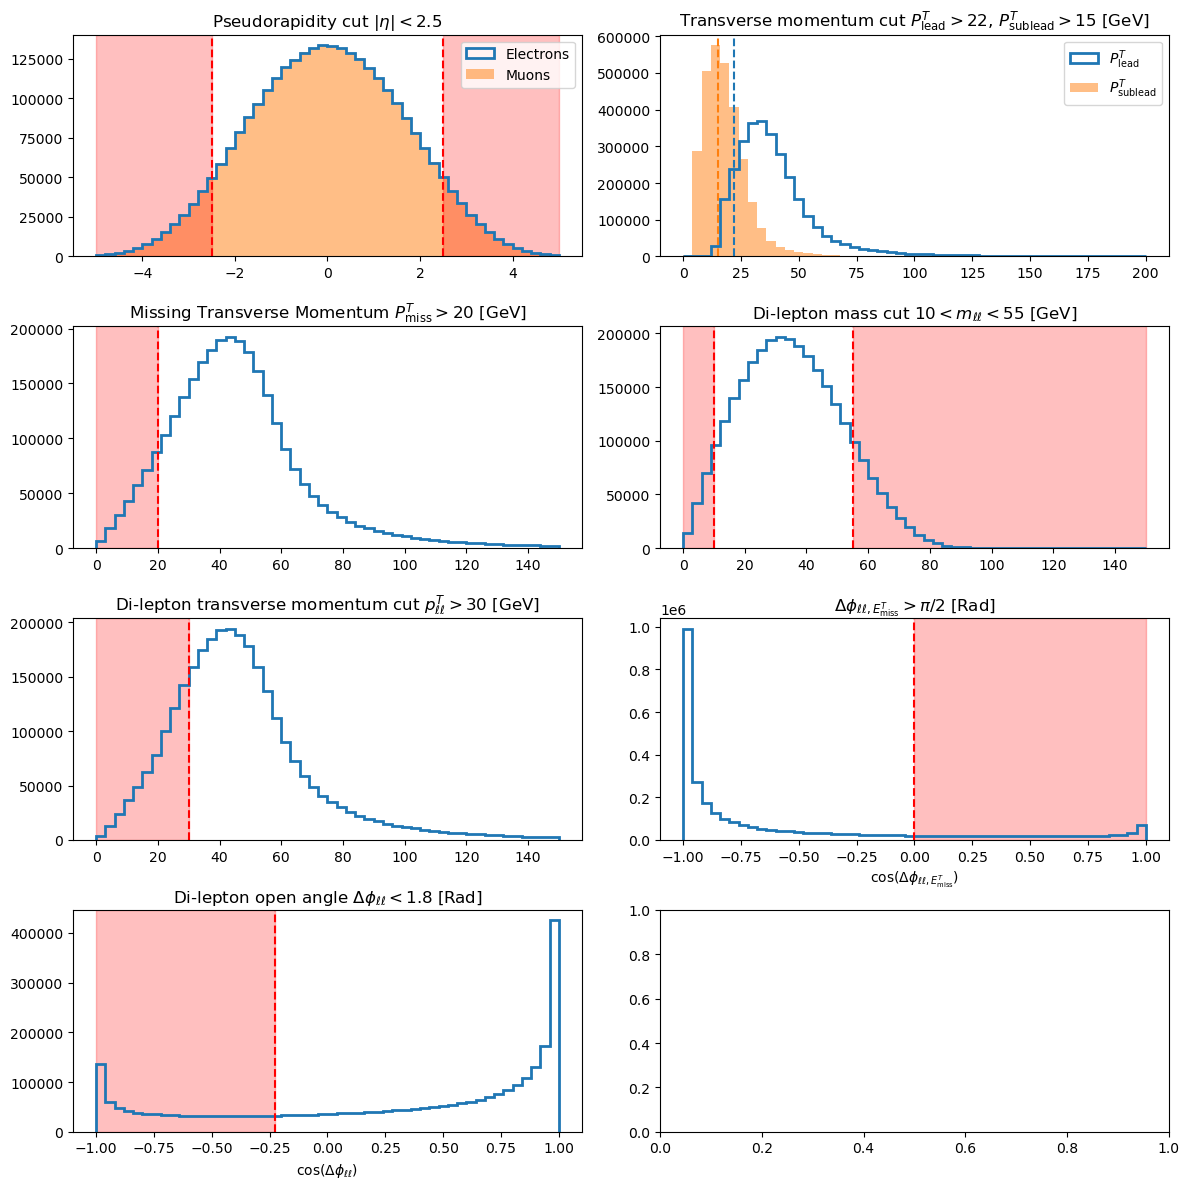

In [103]:
# SELECTION CUTS
positron = np.where(LeptonP_SR['m'] < LeptonM_SR['m'],1,0)
electron = np.where(LeptonM_SR['m'] < LeptonP_SR['m'],1,0)
pos_muon = np.where(LeptonP_SR['m'] < LeptonM_SR['m'],0,1)
neg_muon = np.where(LeptonM_SR['m'] < LeptonP_SR['m'],0,1)
Lepton_e_SR = LeptonP_SR.apply(lambda x : x*positron) + LeptonM_SR.apply(lambda x : x*electron)
Lepton_mu_SR = LeptonP_SR.apply(lambda x : x*pos_muon) + LeptonM_SR.apply(lambda x : x*neg_muon)
fig,ax = plt.subplots(nrows=4,ncols=2,tight_layout=True,figsize=(12,12))
ax = ax.flatten()
ax[0].set_title(r"Pseudorapidity cut $|\eta|<2.5$")
ax[0].hist(Lepton_e_SR[ 'eta'],range=[-5,5],bins=50,histtype='step',lw=2,label='Electrons')
ax[0].hist(Lepton_mu_SR['eta'],range=[-5,5],bins=50,histtype='bar',alpha=0.5,label='Muons')
ax[0].axvline(-2.5,ls='dashed',c='r')
ax[0].axvline(2.5,ls='dashed',c='r')
ax[0].axvspan(xmin=-5,xmax=-2.5,color='r',alpha=0.25)
ax[0].axvspan(xmin=2.5,xmax=5,color='r',alpha=0.25)
ax[0].legend()

ax[1].set_title(r"Transverse momentum cut $P^T_\mathrm{lead} > 22$, $P^T_\mathrm{sublead} > 15$ [GeV]") # Preselection
ax[1].hist(LeadingLep_SR['pt'],bins=50,range=[0,200],histtype='step',lw=2,label=r'$P^T_\mathrm{lead}$')
ax[1].hist(SubleadLep_SR['pt'],bins=50,range=[0,200],histtype='bar',alpha=0.5,label=r'$P^T_\mathrm{sublead}$')
ax[1].axvline(22,c='C0',ls='dashed')
ax[1].axvline(15,c='C1',ls='dashed')
ax[1].legend()

ax[2].set_title(r"Missing Transverse Momentum $P^T_\mathrm{miss} > 20$ [GeV]")
ax[2].hist(MET_SR['pt'],bins=50,range=[0,150],histtype='step',lw=2)
ax[2].axvline(20,c='r',ls='dashed')
ax[2].axvspan(xmin=0,xmax=20,color='r',alpha=0.25)

ax[3].set_title(r"Di-lepton mass cut $10 < m_{\ell\ell} < 55$ [GeV]") #Upper-bound topology, Lower-bound: Preselection
ax[3].hist(diLepton_SR['m'],bins=50,range=[0,150],histtype='step',lw=2,label=r'$m_{\ell\ell}$')
ax[3].axvline(10,c='r',ls='dashed')
ax[3].axvline(55,c='r',ls='dashed')
ax[3].axvspan(xmin=0,xmax=10,color='r',alpha=0.25)
ax[3].axvspan(xmin=55,xmax=150,color='r',alpha=0.25)

ax[4].set_title(r"Di-lepton transverse momentum cut $p^T_{\ell\ell} > 30$ [GeV]") # Background rejection
ax[4].hist(diLepton_SR['pt'],bins=50,range=[0,150],histtype='step',lw=2,label=r'$P^T_{\ell\ell}$') 
ax[4].axvline(30,c='r',ls='dashed')
ax[4].axvspan(xmin=0,xmax=30,color='r',alpha=0.25)

ax[5].set_title(r"$\Delta\phi_{\ell\ell,E^T_\mathrm{miss}} > \pi/2$ [Rad]") # Background rejection
ax[5].hist(( np.cos(MET_SR['phi'] - diLepton_SR['phi']) ),histtype='step',lw=2,bins=50,range=[-1,1])
ax[5].axvline(0,c='r',ls='dashed')
ax[5].set_xlabel(r'$\cos(\Delta\phi_{\ell\ell,E^T_\mathrm{miss}})$')
ax[5].axvspan(xmin=0,xmax=1,color='r',alpha=0.25)

ax[6].set_title(r"Di-lepton open angle $\Delta\phi_{\ell\ell} < 1.8$ [Rad]") # topology
ax[6].hist(( np.cos(LeptonP_SR['phi'] - LeptonM_SR['phi']) ),histtype='step',lw=2,bins=50,range=[-1,1])
ax[6].axvline(np.cos(1.8),c='r',ls='dashed')
ax[6].set_xlabel(r'$\cos(\Delta\phi_{\ell\ell})$')
ax[6].axvspan(xmin=-1,xmax=np.cos(1.8),color='r',alpha=0.25)
plt.show()

In [6]:
def Boost_pT_eta_phi(particle,frame_label):
    pt  =  'pt_' + frame_label
    eta = 'phi_' + frame_label
    phi = 'eta_' + frame_label
    particle[pt ] =  np.sqrt(particle['px_' + frame_label]**2 + particle['py_' + frame_label]**2)
    particle[eta] =-1*np.log(0.5*np.arctan(np.abs(particle[pt]/particle['pz_' + frame_label])))
    particle[phi] =  np.arctan2(particle['py_' + frame_label],particle['px_' + frame_label])

mv.BoostToRest(     Higgs_SR,    'H',None,Higgs_SR,'H',None)
mv.BoostToRest(  diLepton_SR,'diLep',None,Higgs_SR,'H',None)
mv.BoostToRest(diNeutrino_SR,'diLep',None,Higgs_SR,'H',None)
mv.BoostToRest(LeadingLep_SR, 'lLep',None,Higgs_SR,'H',None)
mv.BoostToRest(SubleadLep_SR, 'sLep',None,Higgs_SR,'H',None)
mv.BoostToRest( LeadingNu_SR,  'lNu',None,Higgs_SR,'H',None)
mv.BoostToRest( SubleadNu_SR,  'sNu',None,Higgs_SR,'H',None)
#Boost_pT_eta_phi(Higgs_SR,'H')
Boost_pT_eta_phi(diLepton_SR,'H')
Boost_pT_eta_phi(diNeutrino_SR,'H')
Boost_pT_eta_phi(LeadingLep_SR,'H')
Boost_pT_eta_phi(SubleadLep_SR,'H')
Boost_pT_eta_phi(LeadingNu_SR,'H')
Boost_pT_eta_phi(SubleadNu_SR,'H')

In [16]:

evt_id = (np.random.choice(len(Higgs_SR['E']),size=1))[0]
#evt_id = 2022166
print('Event :',evt_id)
m_Higgs = 125.35 # GeV
four_momentum = ['E','px','py','pz','m']
diLep = diLepton_SR.loc[evt_id,four_momentum].to_numpy()
diNu  = np.array([diNeutrino_SR[ 'E'].iat[evt_id],\
                  diNeutrino_SR['px'].iat[evt_id],\
                  diNeutrino_SR['py'].iat[evt_id],\
                  diNeutrino_SR['pz'].iat[evt_id],\
          np.sqrt(diNeutrino_SR['m2'].iat[evt_id])]) #(E, Px, Py, Pz, m)
PT_miss = MET_SR.loc[evt_id,['pt','px','py']]
P_diLep = mv.vec_mag(diLep[1],diLep[2],diLep[3])
if LeptonP_SR.loc[evt_id,'pt'] > LeptonM_SR.loc[evt_id,'pt']:
    WBoson1   =   WBosonP_SR.loc[evt_id,four_momentum].to_numpy()
    WBoson2   =   WBosonM_SR.loc[evt_id,four_momentum].to_numpy()
    Lepton1   =   LeptonP_SR.loc[evt_id,four_momentum].to_numpy()
    Lepton2   =   LeptonM_SR.loc[evt_id,four_momentum].to_numpy()
    Neutrino1 = NeutrinoP_SR.loc[evt_id,four_momentum].to_numpy()
    Neutrino2 = NeutrinoM_SR.loc[evt_id,four_momentum].to_numpy()
    Nu2_eta   = NeutrinoM_SR.loc[evt_id,'eta']
    Nu2_phi   = NeutrinoM_SR.loc[evt_id,'phi']
    Nu2_PT    = NeutrinoM_SR.loc[evt_id ,'pt']
else:
    WBoson1   =   WBosonM_SR.loc[evt_id,four_momentum].to_numpy()
    WBoson2   =   WBosonP_SR.loc[evt_id,four_momentum].to_numpy()
    Lepton1   =   LeptonM_SR.loc[evt_id,four_momentum].to_numpy()
    Lepton2   =   LeptonP_SR.loc[evt_id,four_momentum].to_numpy()
    Neutrino1 = NeutrinoM_SR.loc[evt_id,four_momentum].to_numpy()
    Neutrino2 = NeutrinoP_SR.loc[evt_id,four_momentum].to_numpy()
    Nu2_eta   = NeutrinoP_SR.loc[evt_id,'eta']
    Nu2_phi   = NeutrinoP_SR.loc[evt_id,'phi']
    Nu2_PT    = NeutrinoP_SR.loc[evt_id ,'pt']
print(" On-shell W boson mass : {}".format(WBoson1[4]))  
print("Off-shell W boson mass : {}".format(WBoson2[4]))  
print("    Leading lepton mass: {}".format(Lepton1[4]))
print("Sub-leading lepton mass: {}".format(Lepton2[4]))
print("Sub-leading neutrino:")
print("\tPT : {}".format(Nu2_PT))
print("\tPhi: {}".format(Nu2_phi))
print("\tPx : {}".format(Neutrino2[1]))
print("\tPy : {}".format(Neutrino2[2]))
print("\tPz : {}".format(Neutrino2[3]))
print("\tE  : {}".format(Neutrino2[0]))
print("\tEta: {}".format(Nu2_eta))
print("Calculation:")
R00 = Nu2_PT*np.cosh(Nu2_eta) 
R03 = Nu2_PT*np.sinh(Nu2_eta)
print("\tPT*sinh(eta) = ",R03)
print("\tPT*cosh(eta) = ",R00)
L4 = WBoson2[4]**2 - Lepton2[4]**2
R0 = R00*Lepton2[0] - R03*Lepton2[3]
R1 = Lepton2[1]*Neutrino2[1]
R2 = Lepton2[2]*Neutrino2[2]
print("(LHS)   (m*)^2 - (m_l2)^2 = ", L4)
print("(RHS) 2*{PT_ν2*[E_l2*cosh(η*) - Pz_l2*sinh(η*)] - Px_l2*Px_ν2 - Py_l2*Py_ν2} = ", 2*(R0 - R1 - R2))
print("(LHS) - (RHS) = ", L4 - 2*(R0 - R1 - R2))

Event : 527573
 On-shell W boson mass : 79.26
Off-shell W boson mass : 37.107613281
    Leading lepton mass: 0.105660004
Sub-leading lepton mass: 0.0005110000000000001
Sub-leading neutrino:
	PT : 18.708891826
	Phi: 0.055723
	Px : 18.679853515999998
	Py : 1.041972168
	Pz : 0.841271484
	E  : 18.727796875
	Eta: 0.044951
Calculation:
	PT*sinh(eta) =  0.8412666391949624
	PT*cosh(eta) =  18.727796531231107
(LHS)   (m*)^2 - (m_l2)^2 =  1376.9749631511265
(RHS) 2*{PT_ν2*[E_l2*cosh(η*) - Pz_l2*sinh(η*)] - Px_l2*Px_ν2 - Py_l2*Py_ν2} =  1376.9748519396271
(LHS) - (RHS) =  0.00011121149941573094


No handles with labels found to put in legend.
No handles with labels found to put in legend.


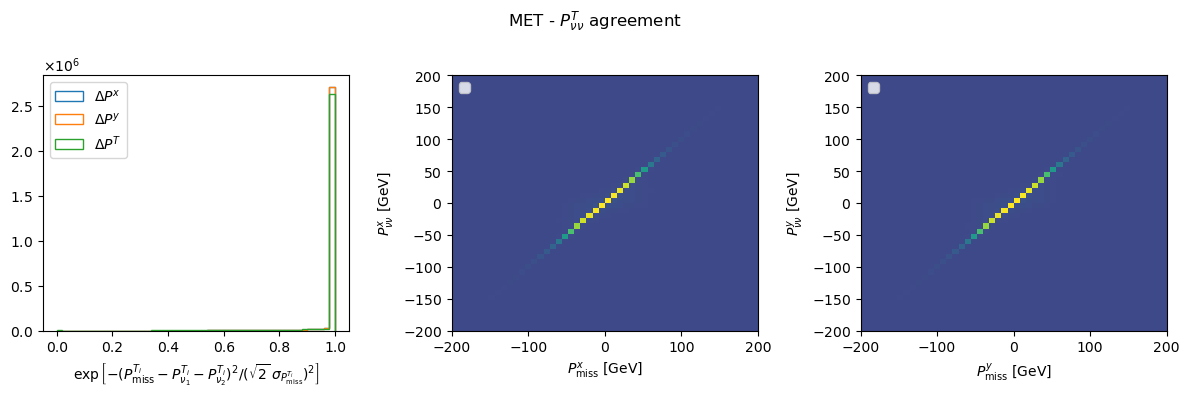

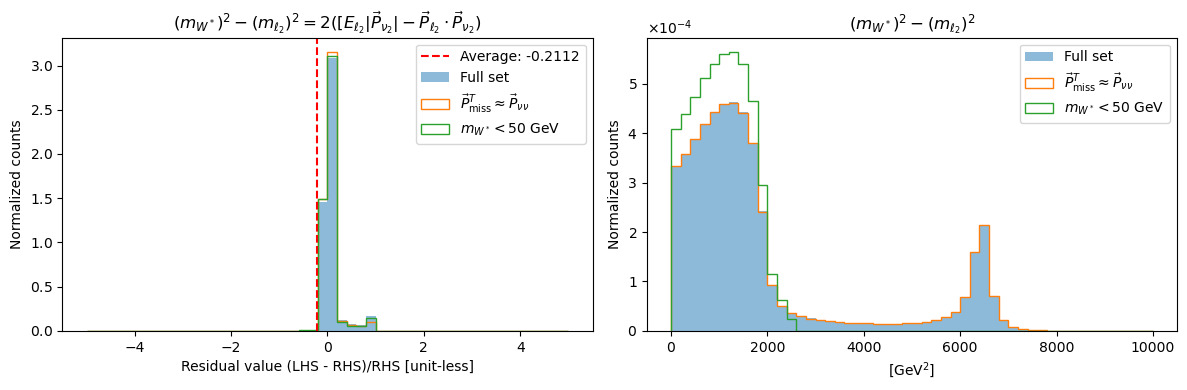

In [104]:
fig, axs = plt.subplots(nrows=1,ncols=3,figsize=(12,4),tight_layout=True)
axs = axs.flatten()
#residuals = np.sqrt(np.abs(L4 - 2*(R0 - R1 - R2)))
D_px = (MET_SR['px'] - LeadingNu_SR['px'] - SubleadNu_SR['px'])/(np.std(MET_SR['px']))
D_py = (MET_SR['py'] - LeadingNu_SR['py'] - SubleadNu_SR['py'])/(np.std(MET_SR['py']))
MET_simeq_NuPT_SR =np.exp(-0.5*D_px**2)*np.exp(-0.5*D_py**2) 
axs[0].hist(np.exp(-0.5*D_px**2),histtype='step',bins=50,range=[0,1],label=r'$\Delta P^x$')
axs[0].hist(np.exp(-0.5*D_py**2),histtype='step',bins=50,range=[0,1],label=r'$\Delta P^y$')
axs[0].hist(MET_simeq_NuPT_SR,histtype='step',bins=50,range=[0,1],label=r'$\Delta P^T$')
axs[0].set_xlabel(r"$\exp\left[-(P^{T_i}_\mathrm{miss} - P^{T_i}_{\nu_1} - P^{T_i}_{\nu_2})^2/(\sqrt{2} \: \sigma_{P^{T_i}_\mathrm{miss}})^2 \right] $")
axs[1].hist2d(MET_SR['px'],(LeadingNu_SR['px']+SubleadNu_SR['px']),range=[[-200,200],[-200,200]],bins=(50,50),cmap=my_cmap,vmin=1,label=' ')
axs[1].set_xlabel(r"$P^x_\mathrm{miss}$ [GeV]")
axs[1].set_ylabel(r"$P^x_{\nu\nu}$ [GeV]")
axs[2].hist2d(MET_SR['py'],(LeadingNu_SR['py']+SubleadNu_SR['py']),range=[[-200,200],[-200,200]],bins=(50,50),cmap=my_cmap,vmin=1,label=' ')
axs[2].set_xlabel(r"$P^y_\mathrm{miss}$ [GeV]")
axs[2].set_ylabel(r"$P^y_{\nu\nu}$ [GeV]")
plt.suptitle(r"MET - $P^T_{\nu\nu}$ agreement")
for i in axs:
    #print( i.legend() )
    i.legend(loc=2) 
    i.ticklabel_format(axis='y',style='sci',useMathText=True,scilimits=(-4,4))
plt.show()

L4 = SubleadW_SR['m']**2 - SubleadLep_SR['m']**2
R00 = SubleadNu_SR['pt']*np.cosh(SubleadNu_SR['eta']) 
R03 = SubleadNu_SR['pt']*np.sinh(SubleadNu_SR['eta']) 
R0 = R00*SubleadLep_SR['E'] - R03*SubleadLep_SR['pz']
R1 = SubleadLep_SR['px']*SubleadNu_SR['px']
R2 = SubleadLep_SR['py']*SubleadNu_SR['py']
residuals = (L4 - 2*R0 + 2*R1 + 2*R2)/(L4)
fig, axs = plt.subplots(nrows=1,ncols=2,figsize=(12,4),tight_layout=True)
axs = axs.flatten()
axs[0].hist(residuals,bins=50,range=[-5,5],histtype='bar',alpha=0.5,density=True,label='Full set')
axs[0].set_title(r"$({m_{W^*}})^2 - (m_{\ell_2})^2  = 2([E_{\ell_2}|\vec{P}_{\nu_2}| -\vec{P}_{\ell_2}\cdot\vec{P}_{\nu_2})$")
axs[0].set_xlabel(r"Residual value (LHS - RHS)/RHS [unit-less]")
axs[0].axvline(np.mean(residuals),ls='dashed',c='r',label='Average: {:.4f}'.format(np.mean(residuals)))
# exclude events with poor MET-PT agreement i.e. MET_Px/y deviates greatly from Px/y νν 
a = np.where(MET_simeq_NuPT_SR>0.81, True, False)
axs[0].hist(residuals[a],bins=50,range=[-5,5],histtype='step',lw=1,density=True,label=r'$\vec{P}^T_\mathrm{miss} \approx \vec{P}_{\nu\nu}$')
# exclued events with off-shell W boson mass > 50 GeV
b = np.where(SubleadW_SR['m']<50, True, False)
axs[0].hist(residuals[b],bins=50,range=[-5,5],histtype='step',lw=1,density=True,label=r'$m_{W^*} < 50$ GeV')
# exclude all
#axs[0].hist(residuals[a&b],bins=50,range=[-12,12],histtype='step',lw=1,density=True,label=r'$m_{W^*} < 50$ GeV $\cap \vec{P}^T_\mathrm{miss} \approx \vec{P}_{\nu\nu}$')
# plot LHS
axs[1].set_title("$({m_{W^*}})^2 - ({m_{\ell_2}})^2$")
axs[1].hist(L4,bins=50,range=[0,10000],histtype='bar',alpha=0.5,density=True,label='Full set')
axs[1].hist(L4[a],bins=50,range=[0,10000],histtype='step',lw=1,density=True,label=r'$\vec{P}^T_\mathrm{miss} \approx \vec{P}_{\nu\nu}$')
axs[1].hist(L4[b],bins=50,range=[0,10000],histtype='step',lw=1,density=True,label=r'$m_{W^*} < 50$ GeV')
axs[1].set_xlabel("[$\mathrm{GeV}^2$]")
#axs[1].hist(L4[a&b],bins=50,range=[0,10000],histtype='step',lw=2,density=True,label=r'$m_{W^*} < 50$ GeV $\cap \vec{P}^T_\mathrm{miss} \approx \vec{P}_{\nu\nu}$')

for i in axs:
    i.set_ylabel("Normalized counts")
    i.legend()
    i.ticklabel_format(axis="y",style="sci",scilimits=(-3,3),useMathText=True)
plt.show()

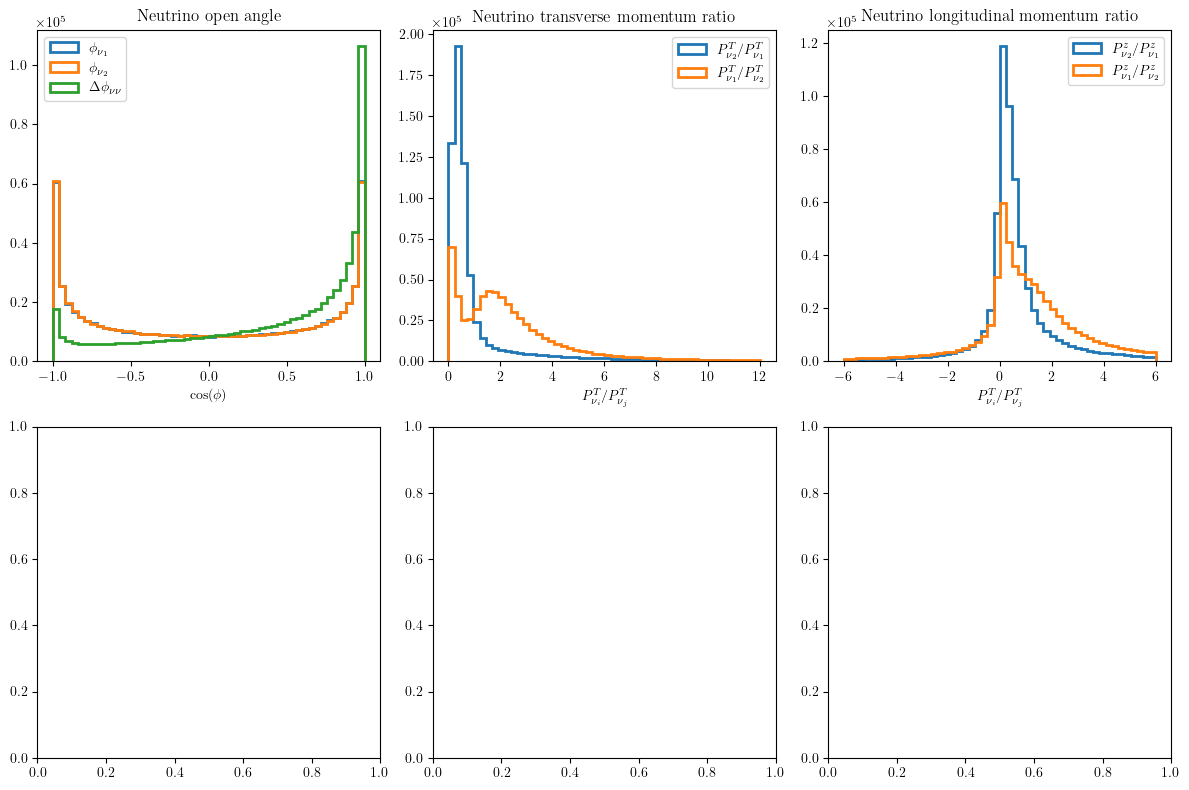

In [7]:
fig, ax = plt.subplots(nrows=2,ncols=3,figsize=(12,8),tight_layout=True)
ax = ax.flatten()
#np.cos(SubleadNu_SR['phi']-LeadingNu_SR['phi'])
diNu_dPhi = np.where(LeadingNu_SR['phi']*SubleadNu_SR['phi']>0, np.abs(np.abs(LeadingNu_SR['phi']) - np.abs(SubleadNu_SR['phi'])),(np.abs(LeadingNu_SR['phi']) + np.abs(SubleadNu_SR['phi'])))
diNu_dPhi = np.where(diNu_dPhi > np.pi, 2*np.pi - diNu_dPhi, diNu_dPhi)
ax[0].hist(np.cos(LeadingNu_SR['phi']),bins=50,range=[-1,1],histtype='step',lw=2,label=r'$\phi_{\nu_1}$')
ax[0].hist(np.cos(SubleadNu_SR['phi']),bins=50,range=[-1,1],histtype='step',lw=2,label=r'$\phi_{\nu_2}$')
ax[0].hist(np.cos(diNu_dPhi),bins=50,range=[-1,1],histtype='step',lw=2,label=r'$\Delta\phi_{\nu\nu}$')
#ax[0].hist(np.cos(LeadingNu_SR['phi'] - SubleadNu_SR['phi']),bins=50,range=[-1,1],histtype='step',lw=2,label=r'$\Delta\phi_{\nu\nu}$')
ax[0].set_title("Neutrino open angle")
ax[0].set_xlabel(r"$\cos(\phi)$")
ax[0].legend(loc=2)
Nu_PT_ratio_21 = SubleadNu_SR['pt']/LeadingNu_SR['pt']
Nu_PT_ratio_12 = LeadingNu_SR['pt']/SubleadNu_SR['pt']
ax[1].hist(Nu_PT_ratio_21,bins=50,range=[0,12],histtype='step',lw=2,label=r'$P^T_{\nu_2}/P^T_{\nu_1}$')
ax[1].hist(Nu_PT_ratio_12,bins=50,range=[0,12],histtype='step',lw=2,label=r'$P^T_{\nu_1}/P^T_{\nu_2}$')
ax[1].set_title("Neutrino transverse momentum ratio")
ax[1].set_xlabel(r"$P^T_{\nu_i}/P^T_{\nu_j}$")
ax[1].legend(loc=1)
Nu_Pz_ratio_21 = SubleadNu_SR['pz']/LeadingNu_SR['pz']
Nu_Pz_ratio_12 = LeadingNu_SR['pz']/SubleadNu_SR['pz']
ax[2].hist(Nu_Pz_ratio_21,bins=50,range=[-6,6],histtype='step',lw=2,label=r'$P^z_{\nu_2}/P^z_{\nu_1}$')
ax[2].hist(Nu_Pz_ratio_12,bins=50,range=[-6,6],histtype='step',lw=2,label=r'$P^z_{\nu_1}/P^z_{\nu_2}$')
ax[2].set_title("Neutrino longitudinal momentum ratio")
ax[2].set_xlabel(r"$P^T_{\nu_i}/P^T_{\nu_j}$")
ax[2].legend(loc=1)
'''
#ax[4].hist2d(Nu_PT_ratio_21,Nu_Pz_ratio_21,bins=[50,50],range=[[0,5],[0,5]],cmap=my_cmap,vmin=1)
#ax[5].hist2d(Nu_PT_ratio_12,Nu_Pz_ratio_21,bins=[50,50],range=[[0,5],[0,5]],cmap=my_cmap,vmin=1)
diNu_dPhi = np.where(LeadingNu_SR['phi_H']*SubleadNu_SR['phi_H']>0, np.abs(np.abs(LeadingNu_SR['phi_H']) - np.abs(SubleadNu_SR['phi_H'])),(np.abs(LeadingNu_SR['phi_H']) + np.abs(SubleadNu_SR['phi_H'])))
diNu_dPhi = np.where(diNu_dPhi > np.pi, 2*np.pi - diNu_dPhi, diNu_dPhi)
ax[3].hist(np.cos(LeadingNu_SR['phi_H']),bins=50,range=[-1,1],histtype='step',lw=2,label=r'$_H\phi_{\nu_1}$')
ax[3].hist(np.cos(SubleadNu_SR['phi_H']),bins=50,range=[-1,1],histtype='step',lw=2,label=r'$_H\phi_{\nu_2}$')
ax[3].hist(np.cos(diNu_dPhi),bins=50,range=[-1,1],histtype='step',lw=2,label=r'$\Delta_H\phi_{\nu\nu}$')
#ax[0].hist(np.cos(LeadingNu_SR['phi'] - SubleadNu_SR['phi']),bins=50,range=[-1,1],histtype='step',lw=2,label=r'$\Delta\phi_{\nu\nu}$')
ax[3].set_title(r"$\Delta\phi_{\nu\nu}$ in Higgs rest frame")
ax[3].set_xlabel(r"$\cos(_H\phi)$")
ax[3].legend(loc=2)
Nu_PT_ratio_21 = SubleadNu_SR['pt_H']/LeadingNu_SR['pt_H']
Nu_PT_ratio_12 = LeadingNu_SR['pt_H']/SubleadNu_SR['pt_H']
ax[4].hist(Nu_PT_ratio_21,bins=50,range=[0,12],histtype='step',lw=2,label=r'$_HP^T_{\nu_2}/_HP^T_{\nu_1}$')
ax[4].hist(Nu_PT_ratio_12,bins=50,range=[0,12],histtype='step',lw=2,label=r'$_HP^T_{\nu_1}/_HP^T_{\nu_2}$')
ax[4].set_title(r"$P^T$ ratio in Higgs rest frame")
ax[4].set_xlabel(r"$_HP^T_{\nu_i}/_HP^T_{\nu_j}$")
ax[4].legend(loc=1)
Nu_Pz_ratio_21 = SubleadNu_SR['pz_H']/LeadingNu_SR['pz_H']
Nu_Pz_ratio_12 = LeadingNu_SR['pz_H']/SubleadNu_SR['pz_H']
ax[5].hist(Nu_Pz_ratio_21,bins=50,range=[-10,10],histtype='step',lw=2,label=r'$_HP^z_{\nu_2}/_HP^z_{\nu_1}$')
ax[5].hist(Nu_Pz_ratio_12,bins=50,range=[-10,10],histtype='step',lw=2,label=r'$_HP^z_{\nu_1}/_HP^z_{\nu_2}$')
ax[5].set_title(r"$P^z$ ratio in Higgs rest rrame")
ax[5].set_xlabel(r"$_HP^z_{\nu_i}/_HP^z_{\nu_j}$")
ax[5].legend(loc=1)
'''
plt.show()

In [45]:
evt_id = np.random.choice(len(Higgs_SR['E']),1,replace=False)[0]
L4_1 = 0.5*(LeadingW_SR.at[evt_id,'m']**2 - LeadingLep_SR.at[evt_id,'m']**2)
print((1 + Nu_PT_ratio_21[evt_id]**2 + 2*np.cos(diNu_dPhi[evt_id])*Nu_PT_ratio_21[evt_id])* LeadingNu_SR.at[evt_id,'pt']**2)
print(  MET_SR.at[evt_id,'pt']**2 )


669.6137206571391
669.6138053353712


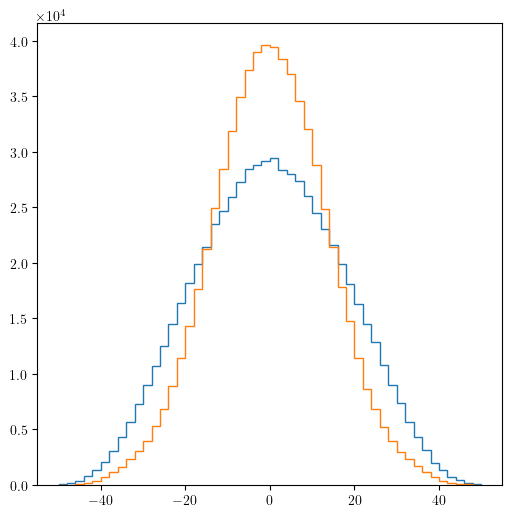

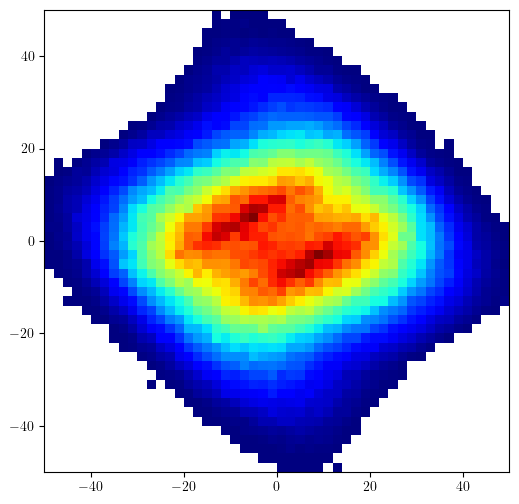

In [89]:
fig = plt.figure(figsize=(6,6))
plt.hist(LeadingLep_SR['pz_H'],bins=50,range=[-50,50],histtype='step')
plt.hist(SubleadLep_SR['pz_H'],bins=50,range=[-50,50],histtype='step')
plt.show()
fig = plt.figure(figsize=(6,6))
plt.hist2d(LeadingLep_SR['pz_H'],SubleadLep_SR['pz_H'],bins=[50,50],range=[[-50,50],[-50,50]],cmap=my_cmap,vmin=1)
plt.show()

In [53]:
evt_id = np.random.choice(len(Higgs_SR['E']))
print(Higgs_SR.at[evt_id,'pz_H'])
print(diNeutrino_SR.at[evt_id,'pz_H'])
print(LeadingNu_SR.at[evt_id,'pz_H'])
print(SubleadNu_SR.at[evt_id,'pz_H'])
print(diLepton_SR.at[evt_id,'pz_H'])
print(LeadingLep_SR.at[evt_id,'pz_H'])
print(SubleadLep_SR.at[evt_id,'pz_H'])

0.0
-14.250945767567679
7.173025575364436
-21.423971342932113
14.250942617710738
16.206751977857206
-1.955809360146465


In [10]:
evt_id = np.random.choice(len(Higgs_SR['E']))
#diNu_dPhi = np.where(LeadingNu_SR['phi']*SubleadNu_SR['phi']>0, np.abs(np.abs(LeadingNu_SR['phi']) - np.abs(SubleadNu_SR['phi'])),(np.abs(LeadingNu_SR['phi']) + np.abs(SubleadNu_SR['phi'])))
#diNu_dPhi = np.where(diNu_dPhi > np.pi, 2*np.pi - diNu_dPhi, diNu_dPhi)
print(LeadingNu_SR.at[evt_id,'phi'])
print(SubleadNu_SR.at[evt_id,'phi'])
print(diNu_dPhi[evt_id])
print(np.cos(diNu_dPhi[evt_id])*LeadingNu_SR.at[evt_id,'pt']*SubleadNu_SR.at[evt_id,'pt'])
print(LeadingNu_SR.at[evt_id,'px']*SubleadNu_SR.at[evt_id,'px'] + LeadingNu_SR.at[evt_id,'py']*SubleadNu_SR.at[evt_id,'py'])

-1.485402
-0.981951
0.5034509999999999
637.251165869533
637.2510382417479


631390
1.000000304784976e-09
-1.7763568394002505e-15
2789.3786088709944
2751.456273521364
2117.6492116152167
0.7573242294181194
2789.3786088709944
3777.206751280581


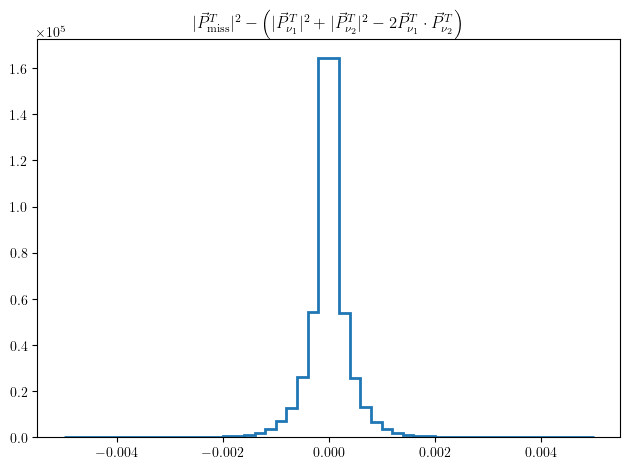

In [90]:
evt_id = np.random.choice(len(Higgs_SR['E']))
print(evt_id)
# α = PT(ν1)/PT(ν2)
# Attempt to consruct an algebraic problem for PT(ν2)
'''
ΜΕΤ^2 = [PT(ν2)]^2 + [PT(ν1)]^2 - 2 PT(ν2) PT(ν1) cos(Δφ)
      = [PT(ν2)]^2 ( 1 + α^2 )  - 2[PT(ν2)]^2 α cos(Δφ) 
'''
print(MET_SR.at[evt_id,'px'] - LeadingNu_SR.at[evt_id,'px'] - SubleadNu_SR.at[evt_id,'px'])
print(MET_SR.at[evt_id,'py'] - LeadingNu_SR.at[evt_id,'py'] - SubleadNu_SR.at[evt_id,'py'])
print(MET_SR.at[evt_id,'pt']**2)
print(LeadingNu_SR.at[evt_id,'pt']**2)
print(SubleadNu_SR.at[evt_id,'pt']**2 * Nu_PT_ratio_12[evt_id]**2)
print(np.cos(diNu_dPhi[evt_id]))#*LeadingNu_SR.[evt_id,'pt']**2*)
print( MET_SR.at[evt_id,'pt']**2) 
print( LeadingNu_SR.at[evt_id,'pt']**2 + SubleadNu_SR.at[evt_id,'pt']**2 + 2*np.cos(diNu_dPhi[evt_id])*(LeadingNu_SR.at[evt_id,'pt'])*(SubleadNu_SR.at[evt_id,'pt']) )
residual = MET_SR['pt']**2 - ( LeadingNu_SR['pt']**2 + SubleadNu_SR['pt']**2 + 2*np.cos(LeadingNu_SR['phi'] - SubleadNu_SR['phi'])*(LeadingNu_SR['pt'])*(SubleadNu_SR['pt']) )
fig = plt.plot(figsize=(6,4))
plt.hist(residual, bins=50,range=[-5e-3,5e-3],histtype='step',lw=2)
plt.title(r"$|\vec{P}^T_\mathrm{miss}|^2 - \left( |\vec{P}^T_{\nu_1}|^2 + |\vec{P}^T_{\nu_2}|^2  - 2\vec{P}^T_{\nu_1}\cdot\vec{P}^T_{\nu_2} \right)$")
plt.tight_layout()
plt.show()

In [13]:
evt_id = np.random.choice(len(Higgs_SR['E']))
# Given: PT ratio PT(ν1)/PT(ν2)
# Given: Δφ(ν1,ν2) or cos(Δφ)
# solve for PT2
# A1[X^2] -> A1 = (1 + Nu_PT_ratio_12**2 )
# A2[X^2] -> A2 = 2*np.cos(LeadingNu_SR['phi'] - SubleadNu_SR['phi'])*Nu_PT_ratio_12
# C [X^0] -> C  = -1*MET_SR['pt']**2
# Higgs Weighting 
# MH ~ 125 GeV
# M(H)^2 - M(W*)^2 - M(W)^2 = 2* { E(W*)E(W) - Px(W*) Px(W) - Py(W*)Py(W) - Pz(W*)Pz(W) }
# Px(W*) = SubleadLep_SR.at[evt_id,'px'] + SubleadNu_SR.at[evt_id,'pt']*np.cos(  SubleadNu_SR.at[evt_id,'phi'])
# Px(W ) = LeadingLep_SR.at[evt_id,'px'] + LeadingNu_SR.at[evt_id,'pt']*np.cos(  LeadingNu_SR.at[evt_id,'phi'])
# Py(W*) = SubleadLep_SR.at[evt_id,'py'] + SubleadNu_SR.at[evt_id,'pt']*np.sin(  SubleadNu_SR.at[evt_id,'phi'])
# Py(W ) = LeadingLep_SR.at[evt_id,'py'] + LeadingNu_SR.at[evt_id,'pt']*np.sin(  LeadingNu_SR.at[evt_id,'phi'])
# Pz(W*) = SubleadLep_SR.at[evt_id,'pz'] + SubleadNu_SR.at[evt_id,'pt']*np.sinh( SubleadNu_SR.at[evt_id,'eta'])
# Pz(W ) = LeadingLep_SR.at[evt_id,'pz'] + LeadingNu_SR.at[evt_id,'pt']*np.sinh( LeadingNu_SR.at[evt_id,'eta'])
#  E(W*) = SubleadLep_SR.at[evt_id,'E' ] + SubleadNu_SR.at[evt_id,'pt']*np.cosh( SubleadNu_SR.at[evt_id,'eta'])
#  E(W ) = LeadingLep_SR.at[evt_id,'E' ] + LeadingNu_SR.at[evt_id,'pt']*np.cosh( LeadingNu_SR.at[evt_id,'eta'])
print( SubleadNu_SR.at[evt_id,'pt']**2*( (1 + Nu_PT_ratio_12[evt_id]**2 ) + 2*np.cos(LeadingNu_SR.at[evt_id,'phi'] - SubleadNu_SR.at[evt_id,'phi'])*Nu_PT_ratio_12[evt_id] ))
print( MET_SR.at[evt_id,'pt']**2 )

2596.215939726113
2596.215964561922


Event #427157
MET Px check:  -48.57497333011808 -48.574972656
MET Py check:  -23.898852681444726 -23.8988479
PT(ν2) truth   :  25.867582209000002
PT(ν2) estimate:  25.867579707622173
Calculation:
	PT*sinh(η*) =  26.692295668128803
	PT*cosh(η*) =  37.170019208563694
[LHS]         = (m*)^2 - (m_l2)^2 =  1932.4149734821178
[RHS]         = 2*{PT_ν2*[E_l2*cosh(η*) - Pz_l2*sinh(η*)] - Px_l2*Px_ν2 - Py_l2*Py_ν2} =  1932.4148742192592
[LHS] - [RHS] =  9.926285861183715e-05
Extrema location:  -2.6887504692885615 0.4559869216922121
interval: 1 -1.4334311606540453 -3.5133712736975546
interval: 2 -3.5133712736975546 37.34456561044721
interval: 3 37.34456561044721 -1.4334311606540453
Numerical solution to φ(ν2):  [-2.0911844150659613, 3.001534167502291]
φ(ν2) Truth 3.001534
Pz(ν1) truth 25.459433594 Pz(ν1) estimate 26.692295668128803
 E(ν1) truth 43.956523438  E(ν1) estimate 37.170019208563694
	 W1 mass truth     : 6299.480325851806
		 Higgs mass Truth     : 15632.3035877789
	 W1 mass estimate 1: 4

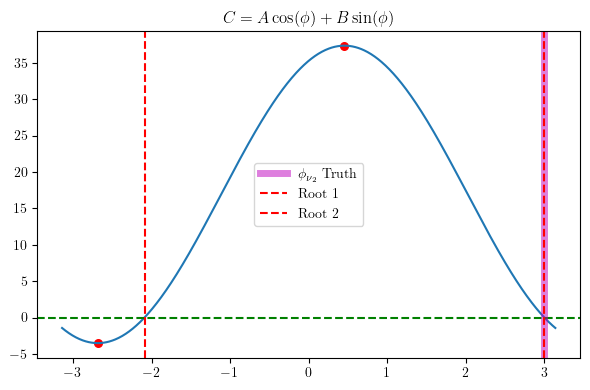

In [11]:
evt_id = np.random.choice(len(Higgs_SR['E']))
tol = 100
print(f'Event #{evt_id}')# 618744
print('MET Px check: ',LeadingNu_SR.at[evt_id,'px'] + SubleadNu_SR.at[evt_id,'pt']*np.cos(SubleadNu_SR.at[evt_id,'phi']),MET_SR.at[evt_id,'px']) 
print('MET Py check: ',LeadingNu_SR.at[evt_id,'py'] + SubleadNu_SR.at[evt_id,'pt']*np.sin(SubleadNu_SR.at[evt_id,'phi']),MET_SR.at[evt_id,'py']) 
A1 = (1 + Nu_PT_ratio_12[evt_id]**2 )
A2 = 2*np.cos(LeadingNu_SR.at[evt_id,'phi'] - SubleadNu_SR.at[evt_id,'phi'])*Nu_PT_ratio_12[evt_id]
C  = MET_SR.at[evt_id,'pt']**2
Nu2_PT_est = np.sqrt(C/ (A1+A2))
print('PT(ν2) truth   : ',SubleadNu_SR.at[evt_id,'pt'])
print('PT(ν2) estimate: ', Nu2_PT_est)
print("Calculation:")
R00 = Nu2_PT_est*np.cosh(SubleadNu_SR.at[evt_id,'eta']) 
R03 = Nu2_PT_est*np.sinh(SubleadNu_SR.at[evt_id,'eta'])
print("\tPT*sinh(η*) = ",R03)
print("\tPT*cosh(η*) = ",R00)
L4 = SubleadW_SR.at[evt_id,'m']**2 - SubleadLep_SR.at[evt_id,'m']**2
R0 = R00*SubleadLep_SR.at[evt_id,'E'] - R03*SubleadLep_SR.at[evt_id,'pz']
R1 = SubleadLep_SR.at[evt_id,'px']*Nu2_PT_est*np.cos(SubleadNu_SR.at[evt_id,'phi'])
R2 = SubleadLep_SR.at[evt_id,'py']*Nu2_PT_est*np.sin(SubleadNu_SR.at[evt_id,'phi'])
print("[LHS]         = (m*)^2 - (m_l2)^2 = ", L4)
print("[RHS]         = 2*{PT_ν2*[E_l2*cosh(η*) - Pz_l2*sinh(η*)] - Px_l2*Px_ν2 - Py_l2*Py_ν2} = ", 2*(R0 - R1 - R2))
print("[LHS] - [RHS] = ", L4 - 2*(R0 - R1 - R2))
C = (R0 - 0.5*L4)/Nu2_PT_est
A = SubleadLep_SR.at[evt_id,'px'] # cos[φ(ν2)]
B = SubleadLep_SR.at[evt_id,'py'] # sin[φ(ν2)]
def F_Nu2_phi(x,Px,Py,M):
    return Px*np.cos(x) + Py*np.sin(x) - M
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(6,4),tight_layout=True)
phi = np.linspace(-np.pi,np.pi,1000)
ax.set_title(r"$C = A \cos(\phi) + B\sin(\phi)$")
ax.plot(phi,F_Nu2_phi(phi,A,B,C))
ax.axhline(0, c='g', ls='dashed')
ax.scatter(phi[np.argmin(F_Nu2_phi(phi,A,B,C))],np.min(F_Nu2_phi(phi,A,B,C)),s=30,c='r')
ax.scatter(phi[np.argmax(F_Nu2_phi(phi,A,B,C))],np.max(F_Nu2_phi(phi,A,B,C)),s=30,c='r')

from scipy import optimize
index_1 = min(np.argmax(F_Nu2_phi(phi,A,B,C)),np.argmin(F_Nu2_phi(phi,A,B,C)))
index_2 = max(np.argmax(F_Nu2_phi(phi,A,B,C)),np.argmin(F_Nu2_phi(phi,A,B,C)))
print('Extrema location: ',phi[index_1],phi[index_2])
roots = []
tolerance = 100
j=1
for i in [(0,index_1),(index_1,index_2),(index_2,-1)]:
    print(f'interval: {j}', F_Nu2_phi(phi[i[0]],A,B,C),F_Nu2_phi(phi[i[-1]],A,B,C))
    if F_Nu2_phi(phi[i[0]],A,B,C)*F_Nu2_phi(phi[i[-1]],A,B,C) <= 0:
        roots.append(optimize.brentq(lambda x : F_Nu2_phi(x,A,B,C),phi[i[0]],phi[i[-1]]))
    j+=1
if len(roots) == 0:
    if F_Nu2_phi(phi[index_1],A,B,C) < tolerance or F_Nu2_phi(phi[index_2],A,B,C) < tolerance:
        #print(phi[np.argmin(F_Nu2_phi(phi,A,B,C))])
        roots.append(phi[np.argmin(F_Nu2_phi(phi,A,B,C))])
print('Numerical solution to φ(ν2): ',roots) 
print('φ(ν2) Truth',SubleadNu_SR.at[evt_id,'phi'])
ax.axvline(SubleadNu_SR.at[evt_id,'phi'],c='m',alpha=0.5,lw=5,label=r'$\phi_{\nu_2}$ Truth')
R00_1 = diNeutrino_SR.at[evt_id,'E'] - R00 # E(νν) -  Ε(ν2) =  E(ν1)
R03_1 = diNeutrino_SR.at[evt_id,'pz']- R03 #PZ(νν) - Pz(ν2) = Pz(ν2)
print('Pz(ν1) truth',LeadingNu_SR.at[evt_id,'pz'],'Pz(ν1) estimate',R03)
print(' E(ν1) truth',LeadingNu_SR.at[evt_id,'E'] ,' E(ν1) estimate',R00)
L4_1 = LeadingLep_SR.at[evt_id,'m']**2
R0_1 = R00_1*LeadingLep_SR.at[evt_id,'E'] - R03_1*LeadingLep_SR.at[evt_id,'pz']
W1_pz_est  = LeadingLep_SR.at[evt_id,'pz'] + R03_1
W1_E_est   = LeadingLep_SR.at[evt_id,'E' ] + R00_1
W2_pz_est  = SubleadLep_SR.at[evt_id,'pz'] + R03
W2_E_est   = SubleadLep_SR.at[evt_id,'E' ] + R00
j=1
for i in roots:
    if j == 1 : print('\t','W1 mass truth     :',LeadingW_SR.at[evt_id,'m']**2)
    if j == 1 : print('\t\t','Higgs mass Truth     :', Higgs_SR.at[evt_id,'m']**2)
    ax.axvline(i,ls='dashed',c='r',label='Root {}'.format(j))
    A = LeadingLep_SR.at[evt_id,'px']*(MET_SR.at[evt_id,'px'] - Nu2_PT_est*np.cos(i)) 
    B = LeadingLep_SR.at[evt_id,'py']*(MET_SR.at[evt_id,'py'] - Nu2_PT_est*np.sin(i)) 
    mw1_est = 2*(R0_1 - A - B) + L4_1
    print('\t',f'W1 mass estimate {j}:',mw1_est)
    #print('factors: ',R0,A,B)
    W2_px_est  = SubleadLep_SR.at[evt_id,'px'] + Nu2_PT_est*np.cos(i)
    W2_py_est  = SubleadLep_SR.at[evt_id,'py'] + Nu2_PT_est*np.sin(i)
    W1_px_est  = LeadingLep_SR.at[evt_id,'px'] + MET_SR.at[evt_id,'px'] - Nu2_PT_est*np.cos(i)
    W1_py_est  = LeadingLep_SR.at[evt_id,'py'] + MET_SR.at[evt_id,'py'] - Nu2_PT_est*np.sin(i)
    H_mass_est = SubleadW_SR.at[evt_id,'m']**2 + mw1_est + 2*( W2_E_est *W1_E_est -\
                                                               W2_px_est*W1_px_est-\
                                                               W2_py_est*W1_py_est-\
                                                               W2_pz_est*W1_pz_est)
    print('\t\t',f'Higgs mass estimate {j}:',H_mass_est )# squared value
    #c =    Higgs_SR.at[evt_id,'m' ]**2 - \
    c =    H_mass_est - \
        diLepton_SR.at[evt_id,'m' ]**2 - \
     (diNeutrino_SR.at[evt_id,'E' ]**2 - diNeutrino_SR.at[evt_id,'pz']**2) - \
      2*diLepton_SR.at[evt_id,'E' ]*diNeutrino_SR.at[evt_id,'E' ] + \
      2*diLepton_SR.at[evt_id,'pz']*diNeutrino_SR.at[evt_id,'pz']
    b = 2*diLepton_SR.at[evt_id,'pt']*np.cos(diLepton_SR.at[evt_id,'phi'] - diNeutrino_SR.at[evt_id,'phi']) 
    if b**2 - 4*c > 0:
        print(MET_SR.at[evt_id,'pt'])
        print(0.5*(-b + np.sqrt(b**2 - 4*c)))
        print(0.5*(-b - np.sqrt(b**2 - 4*c)))
    elif c - (b/2)**2<tol:
        print("corrected")
        print(0.5*(-b + np.sqrt(b**2 - 4*(c-tol))))
        print(0.5*(-b - np.sqrt(b**2 - 4*(c-tol))))
    j = j+1
ax.legend()
plt.show()


$$
\begin{align}
{m_{W^*}}^2 = {m_{\ell_2}}^2 + {m_{\nu_2}}^2 - 2 (E_{\ell_2}E_{\nu_2 }- \vec{P}^_{\ell_2}\cdot\vec{P}_{\nu_2}) \\
= {m_{\ell_2}}^2 + {m_{\nu_2}}^2 
- 2 P^T_{\nu_2}[  E_{\ell_2}\cosh(\eta_{\nu)2}) -P^z_{\ell_2 \sinh(\eta_{\nu_2}) \\
 - P^x_{\ell_2}\cos(\phi_{\nu_2}) - P^y_{\ell_2}\sin(\phi_{\nu_2})]

\end{align}

$$

In [627]:

# Higgs Weighting 
# MH ~ 125 GeV
# M(H)^2 - M(W*)^2 - M(W)^2 = 2* { E(W*)E(W) - Px(W*) Px(W) - Py(W*)Py(W) - Pz(W*)Pz(W) }
# Px(W*) = SubleadLep_SR.at[evt_id,'px'] + SubleadNu_SR.at[evt_id,'pt']*np.cos(  SubleadNu_SR.at[evt_id,'phi'])
# Px(W ) = LeadingLep_SR.at[evt_id,'px'] + LeadingNu_SR.at[evt_id,'pt']*np.cos(  LeadingNu_SR.at[evt_id,'phi'])
# Py(W*) = SubleadLep_SR.at[evt_id,'py'] + SubleadNu_SR.at[evt_id,'pt']*np.sin(  SubleadNu_SR.at[evt_id,'phi'])
# Py(W ) = LeadingLep_SR.at[evt_id,'py'] + LeadingNu_SR.at[evt_id,'pt']*np.sin(  LeadingNu_SR.at[evt_id,'phi'])
# Pz(W*) = SubleadLep_SR.at[evt_id,'pz'] + SubleadNu_SR.at[evt_id,'pt']*np.sinh( SubleadNu_SR.at[evt_id,'eta'])
# Pz(W ) = LeadingLep_SR.at[evt_id,'pz'] + LeadingNu_SR.at[evt_id,'pt']*np.sinh( LeadingNu_SR.at[evt_id,'eta'])
#  E(W*) = SubleadLep_SR.at[evt_id,'E' ] + SubleadNu_SR.at[evt_id,'pt']*np.cosh( SubleadNu_SR.at[evt_id,'eta'])
#  E(W ) = LeadingLep_SR.at[evt_id,'E' ] + LeadingNu_SR.at[evt_id,'pt']*np.cosh( LeadingNu_SR.at[evt_id,'eta'])
# MET weighting 
Higgs_mass = 125.11 # GeV
#Higgs_mass**2 + 
evt_id = np.random.choice(len(Higgs_SR['E']),1,replace=False)[0]
m2 = (diNeutrino_SR.at[evt_id,'E']**2 - mv.vec_mag_2(diNeutrino_SR.at[evt_id,'px'],\
                                                     diNeutrino_SR.at[evt_id,'py'],\
                                                     diNeutrino_SR.at[evt_id,'pz']))
pt = mv.vec_mag(diNeutrino_SR.at[evt_id,'px'],diNeutrino_SR.at[evt_id,'py'],0)
E = (diNeutrino_SR.at[evt_id,'E'])
z = (diNeutrino_SR.at[evt_id,'pz'])
eta = (diNeutrino_SR.at[evt_id,'eta'])
print(pt**2 * np.cosh(eta)**2, E**2)
print(pt**2 * np.sinh(eta)**2, z**2)
print(pt**2, E**2 - z**2 - m2)
print(pt**2)

b = 2*diLepton_SR.at[evt_id,'pt']*np.cos(diLepton_SR.at[evt_id,'phi'] - diNeutrino_SR.at[evt_id,'phi']) 
c =    Higgs_SR.at[evt_id,'m' ]**2 - \
    diLepton_SR.at[evt_id,'m' ]**2 - \
 (diNeutrino_SR.at[evt_id,'E' ]**2 - diNeutrino_SR.at[evt_id,'pz']**2) - \
  2*diLepton_SR.at[evt_id,'E' ]*diNeutrino_SR.at[evt_id,'E' ] + \
  2*diLepton_SR.at[evt_id,'pz']*diNeutrino_SR.at[evt_id,'pz']

print( b**2 - 4*c )

print(pt)
tol = 100

if b**2 - 4*c > 0:
    print(0.5*(-b + np.sqrt(b**2 - 4*c)))
    print(0.5*(-b - np.sqrt(b**2 - 4*c)))


3066.045186017426 3224.2197006852816
484.04545663125606 484.04545663125634
2581.99972938617 2581.9997293861707
2581.99972938617
50.81338140082955
235.5236788530101
50.79632405641904
35.44954332386766


In [643]:
evt_id = np.arange(len(Higgs_SR['E']))
b = 2*diLepton_SR.loc[evt_id,'pt']*np.cos(diLepton_SR.loc[evt_id,'phi'] - diNeutrino_SR.loc[evt_id,'phi']) 
c =    Higgs_SR.loc[evt_id,'m' ]**2 - \
    diLepton_SR.loc[evt_id,'m' ]**2 - \
 (diNeutrino_SR.loc[evt_id,'E' ]**2 - diNeutrino_SR.loc[evt_id,'pz']**2) - \
  2*diLepton_SR.loc[evt_id,'E' ]*diNeutrino_SR.loc[evt_id,'E' ] + \
  2*diLepton_SR.loc[evt_id,'pz']*diNeutrino_SR.loc[evt_id,'pz']
a = np.where(b**2 - 4*c > -100 , True, False)
np.unique(a,return_counts=True)

(array([False,  True]), array([154514, 516252]))

In [ ]:
%%time 
random_sample = np.random.choice(len(Higgs_SR['E']),1,replace=False)
#evts = [13537,101210,579270,192272,209016,407380,145055,642493,24793,543228]
def F_Nu2_phi(x,Px,Py,M):
    return Px*np.cos(x) + Py*np.sin(x) - M
def solution_weight(MH,MW):
    dMW = (MW - 80.377**2)/(80.377**2)
    dMH = (MH - 125.11**2)/(125.11**2)
    return np.exp(-0.5*dMH**2)*np.exp(-0.5*dMW**2)
n_div = 100
Nu2_eta_solutions = []
W2_mass_solutions = []
eta_max = []
mw2_max = []
tolerance = 100 # [GeV] (residual tolerance for numerical root solver)
W1_mass_range = np.linspace(0,100,n_div)
W2_mass_range = np.linspace(0,100,n_div)
Nu2_eta_range = np.linspace(-2.5,2.5,n_div)
phi_range = np.linspace(-np.pi,np.pi,100)
#Nu2_eta_range = np.array([SubleadNu_SR.at[evt_id,'eta']])
#mw2_range = np.array([SubleadW_SR.at[evt_id,'m']])
grid_x, grid_y = np.meshgrid(W1_mass_range,W2_mass_range)
grid_w = np.zeros((n_div,n_div))
for evt_id in random_sample:
    max_location = (-999,-999)
    max_weight = -999
    for i,Y in enumerate(W2_mass_range):
        for j,X in enumerate(W1_mass_range):
            Nu1_pz = diNeutrino_SR.at[evt_id,'pz']/(Nu_Pz_ratio_21+1)
            Nu2_pz = diNeutrino_SR.at[evt_id,'pz'] - Nu1_pz
            Νu1_pt2 = MET_SR.at[evt_id,'pt']**2 / (1 + Nu_PT_ratio_21[evt_id]**2 + 2*np.cos(diNu_dPhi[evt_id])*Nu_PT_ratio_21[evt_id])
            Nu1_E = np.sqrt(Nu_1_pt2 + Nu1_pz**2)
            Nu2_E = diNeutrino_SR.at[evt_id,'E'] - Nu1_E
            M1 = (LeadingLep_SR.at[evt_id,'E']*Nu1_E - 0.5*(X**2 + LeadingLep_SR.at[evt_id,'m']**2)/np.sqrt(Nu1_pt2)
            M2 = (SubleadLep_SR.at[evt_id,'E']*Nu2_E - 0.5*(Y**2 + SubleadLep_SR.at[evt_id,'m']**2)/(np.sqrt(Nu1_pt2)*Nu_PT_ratio_21[evt_id])
            

In [29]:
E = 0
random_sample = np.random.choice(len(Higgs_SR['E']),6,replace=False)

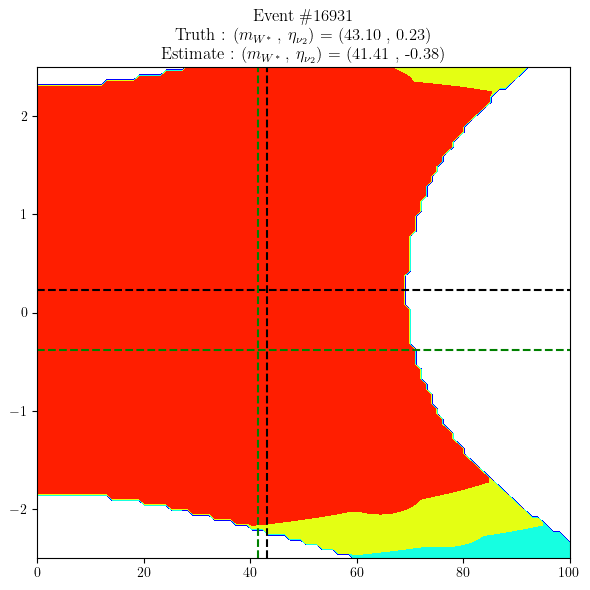

CPU times: user 1.52 s, sys: 56.3 ms, total: 1.57 s
Wall time: 2.49 s


In [13]:
%%time 
random_sample = np.random.choice(len(Higgs_SR['E']),1,replace=False)
#evts = [13537,101210,579270,192272,209016,407380,145055,642493,24793,543228]
def F_Nu2_phi(x,Px,Py,M):
    return Px*np.cos(x) + Py*np.sin(x) - M
def solution_weight(MH,MW):
    dMW = (MW - 80.377**2)/(80.377**2)
    dMH = (MH - 125.11**2)/(125.11**2)
    return np.exp(-0.5*dMH**2)*np.exp(-0.5*dMW**2)
n_div = 100
Nu2_eta_solutions = []
W2_mass_solutions = []
eta_max = []
mw2_max = []
tolerance = 100 # [GeV] (residual tolerance for numerical root solver)
W2_mass_range = np.linspace(0,100,n_div)
Nu2_eta_range = np.linspace(-2.5,2.5,n_div)
phi_range = np.linspace(-np.pi,np.pi,100)
#Nu2_eta_range = np.array([SubleadNu_SR.at[evt_id,'eta']])
#mw2_range = np.array([SubleadW_SR.at[evt_id,'m']])
grid_x, grid_y = np.meshgrid(W2_mass_range,Nu2_eta_range)
grid_w = np.zeros((n_div,n_div))
for evt_id in random_sample:
    max_location = (-999,-999)
    max_weight = -999
    for i,Y in enumerate(Nu2_eta_range):
        for j,X in enumerate(W2_mass_range):
            # general procedure 
            ## 1. solve for PT(ν2) using Δφ(ν1,ν2) and PT(ν1)/PT(ν2)
            A1 = (1 + Nu_PT_ratio_12[evt_id]**2 )
            A2 = 2*np.cos(LeadingNu_SR.at[evt_id,'phi'] - SubleadNu_SR.at[evt_id,'phi'])*Nu_PT_ratio_12[evt_id]
            C  = MET_SR.at[evt_id,'pt']**2
            Nu2_PT_est = np.sqrt(C/ (A1+A2))
            ## 2. solve for φ(ν2)
            R00 = Nu2_PT_est*np.cosh(Y) 
            R03 = Nu2_PT_est*np.sinh(Y)
            L4 = X**2 - SubleadLep_SR.at[evt_id,'m']**2
            R0 = R00*SubleadLep_SR.at[evt_id,'E'] - R03*SubleadLep_SR.at[evt_id,'pz']
            C = (R0 - 0.5*L4)/Nu2_PT_est
            A = SubleadLep_SR.at[evt_id,'px'] # cos[φ(ν2)]
            B = SubleadLep_SR.at[evt_id,'py'] # sin[φ(ν2)]
            #ax.plot(phi,F_Nu2_phi(phi,A,B,C))
            index_1 = min(np.argmax(F_Nu2_phi(phi,A,B,C)),np.argmin(F_Nu2_phi(phi,A,B,C)))
            index_2 = max(np.argmax(F_Nu2_phi(phi,A,B,C)),np.argmin(F_Nu2_phi(phi,A,B,C)))
            roots = []
            for k in [(0,index_1),(index_1,index_2),(index_2,-1)]:
                if F_Nu2_phi(phi[k[0]],A,B,C)*F_Nu2_phi(phi[k[-1]],A,B,C) <= 0:
                    roots.append(optimize.brentq(lambda x : F_Nu2_phi(x,A,B,C),phi[k[0]],phi[k[-1]]))
            if len(roots) == 0:
                if F_Nu2_phi(phi[index_1],A,B,C)**2 < tolerance**2 or F_Nu2_phi(phi[index_2],A,B,C)**2 < tolerance**2:
                    # solution at extrema value
                    a = phi[index_1] if F_Nu2_phi(phi[index_1],A,B,C)**2 < F_Nu2_phi(phi[index_2],A,B,C)**2 else phi[index_2]
                    roots.append(a)
            ## 3. obtain PT(ν1) using the condition PT(miss) - PT(ν2) = PT(ν1)
            #Nu1_PT_est = Nu2_PT_est * Nu_PT_ratio_12
            L4_1 = LeadingLep_SR.at[evt_id,'m']**2
            R00_1 = diNeutrino_SR.at[evt_id,'E'] - R00
            R03_1 = diNeutrino_SR.at[evt_id,'pz']- R03 
            R0_1 = R00_1*LeadingLep_SR.at[evt_id,'E'] - R03_1*LeadingLep_SR.at[evt_id,'pz']
            W2_pz_est  = SubleadLep_SR.at[evt_id,'pz'] + R03 #Nu2_PT_est*np.sinh(Y)
            W2_E_est   = SubleadLep_SR.at[evt_id,'E' ] + R00 #Nu2_PT_est*np.cosh(Y)
            W1_pz_est  = LeadingLep_SR.at[evt_id,'pz'] + R03_1 
            W1_E_est   = LeadingLep_SR.at[evt_id,'E' ] + R00_1
            ## 4. solve for m(W)
            W1_mass= []
            Higgs_mass = []
            if len(roots)!=0:
                for k in roots:
                    A = LeadingLep_SR.at[evt_id,'px']*(MET_SR.at[evt_id,'px'] - Nu2_PT_est*np.cos(k)) 
                    B = LeadingLep_SR.at[evt_id,'py']*(MET_SR.at[evt_id,'py'] - Nu2_PT_est*np.sin(k)) 
                    mw1_est = 2*(R0_1 - A - B) + L4_1
                    W1_mass.append(mw1_est)
                    ## 5. solve for m(H)
                    W2_px_est  = SubleadLep_SR.at[evt_id,'px'] + Nu2_PT_est*np.cos(k)
                    W2_py_est  = SubleadLep_SR.at[evt_id,'py'] + Nu2_PT_est*np.sin(k)
                    W1_px_est  = LeadingLep_SR.at[evt_id,'px'] + MET_SR.at[evt_id,'px'] - Nu2_PT_est*np.cos(k)
                    W1_py_est  = LeadingLep_SR.at[evt_id,'py'] + MET_SR.at[evt_id,'py'] - Nu2_PT_est*np.sin(k)
                    mH_est = X**2 + mw1_est + 2*( W2_E_est *W1_E_est -\
                                                  W2_px_est*W1_px_est-\
                                                  W2_py_est*W1_py_est-\
                                                  W2_pz_est*W1_pz_est)
                
                    Higgs_mass.append(mH_est)
        
            if len(Higgs_mass) != 0 and len(Higgs_mass)==len(W1_mass) : 
                #Nu2_eta_solutions.append(Y)
                #W2_mass_solutions.append(X)
                for a in range(len(Higgs_mass)):
                    '''
                    MET_sol = []
                    c =    H_mass_est - \
                        diLepton_SR.at[evt_id,'m' ]**2 - \
                     (diNeutrino_SR.at[evt_id,'E' ]**2 - diNeutrino_SR.at[evt_id,'pz']**2) - \
                      2*diLepton_SR.at[evt_id,'E' ]*diNeutrino_SR.at[evt_id,'E' ] + \
                      2*diLepton_SR.at[evt_id,'pz']*diNeutrino_SR.at[evt_id,'pz']
                    b = 2*diLepton_SR.at[evt_id,'pt']*np.cos(diLepton_SR.at[evt_id,'phi'] - diNeutrino_SR.at[evt_id,'phi']) 
                    if b**2 - 4*c > 0:
                        #print(MET_SR.at[evt_id,'pt'])
                        MET_sol.append(0.5*(-b + np.sqrt(b**2 - 4*c)))
                        MET_sol.append(0.5*(-b - np.sqrt(b**2 - 4*c)))
                    elif c - (b/2)**2<tolerance:
                        MET_sol.append(0.5*(-b + np.sqrt(b**2 - 4*(c-tolerance))))
                        MET_sol.append(0.5*(-b - np.sqrt(b**2 - 4*(c-tolerance))))
                    if len(MET_sol)==0:
                        weight =  solution_weight(Higgs_mass[a],W1_mass[a])
                    else:
                        dT1 = (MET_sol[0] - MET_SR.at[evt_id,'pt'])/MET_SR.at[evt_id,'pt']
                        dT2 = (MET_sol[1] - MET_SR.at[evt_id,'pt'])/MET_SR.at[evt_id,'pt']
                        weight =  max(np.exp((dT1**2)/(-2)),np.exp((dT2**2)/(-2)))*solution_weight(Higgs_mass[a],W1_mass[a])
                    '''    
                    weight =  solution_weight(Higgs_mass[a],W1_mass[a])
                    grid_w[i,j] = weight if weight > grid_w[i,j] else grid_w[i,j]
                    if grid_w[i,j] > max_weight:
                        max_weight = grid_w[i,j]
                        max_location = (X,Y)
            else:
                grid_w[i,j] = -1
    eta_max.append(max_location[1])    
    mw2_max.append(max_location[0]) 
    fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(6,6),tight_layout=True)
    ax.contourf(grid_x, grid_y, grid_w, cmap=my_cmap, vmin=0)
    ax.set_title(f'Event \#{evt_id}'+'\n'+r'Truth : $(m_{W^*}\:,\:\eta_{\nu_2})$ = ({%.2f} , {%.2f})'%(SubleadW_SR.at[evt_id,'m'],SubleadNu_SR.at[evt_id,'eta'])+'\n'+r'Estimate : $(m_{W^*}\:,\:\eta_{\nu_2})$ = ({%.2f} , {%.2f})'%(max_location[0],max_location[1]))
    ax.axvline(SubleadW_SR.at[evt_id,'m'],ls='dashed',c='k',label = r'Truth $m_{W^*}$')
    ax.axhline(SubleadNu_SR.at[evt_id,'eta'],ls='dashed',c='k',label=r'Truth $\eta_{\nu_2}$')
    ax.axvline(max_location[0],ls='dashed',c='g',label = r'Estimated $m_{W^*}$')
    ax.axhline(max_location[1],ls='dashed',c='g',label=r'Estimated $\eta_{\nu_2}$')
    #plt.savefig("../0117 plots/01/WmH_WmW_{}.png".format(evt_id))
    plt.show()

In [730]:
np.save('WmH_WmW_WpT_eta_b',eta_max)
np.save('WmH_WmW_WpT_mW2_b',mw2_max)


In [734]:
WmH_WmW_WpT_eta_a = np.load('WmH_WmW_WpT_eta_a.npy')
WmH_WmW_WpT_eta_b = np.load('WmH_WmW_WpT_eta_b.npy')
WmH_WmW_WpT_mW2_a = np.load('WmH_WmW_WpT_mW2_a.npy')
WmH_WmW_WpT_mW2_b = np.load('WmH_WmW_WpT_mW2_b.npy')

In [735]:
print(WmH_WmW_WpT_eta_a.shape)
print(WmH_WmW_WpT_eta_b.shape)
print(WmH_WmW_WpT_mW2_a.shape)
print(WmH_WmW_WpT_mW2_b.shape)
WmH_WmW_WpT_eta = np.concatenate((WmH_WmW_WpT_eta_a,WmH_WmW_WpT_eta_b))
WmH_WmW_WpT_mW2 = np.concatenate((WmH_WmW_WpT_mW2_a,WmH_WmW_WpT_mW2_b))
print(WmH_WmW_WpT_eta.shape)
print(WmH_WmW_WpT_mW2.shape)

(2500,)
(2500,)
(2500,)
(2500,)
(5000,)
(5000,)


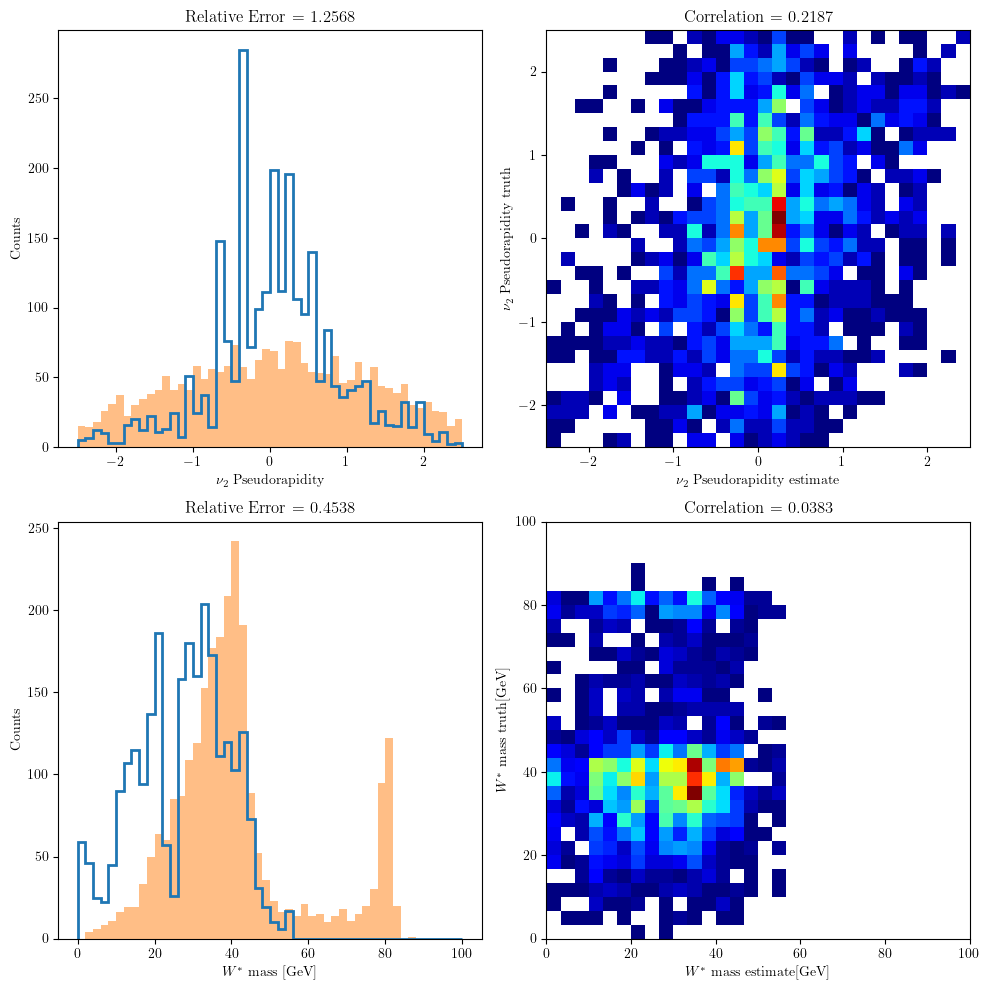

In [25]:
#gprint(np.unique(grid_w,return_counts=True))
random_sample_1 = random_sample
fig, ax = plt.subplots(nrows=2,ncols=2,figsize=(10,10),tight_layout=True)
ax = ax.flatten()
#print(eta_max)
#print(mw2_max)
#parint(random_sample)
#ax[0].hist(WmH_WmW_WpT_eta,bins=50, range =[-2.5,2.5],histtype='step',lw=2)
ax[0].hist(eta_max,bins=50, range =[-2.5,2.5],histtype='step',lw=2)
ax[0].hist(SubleadNu_SR['eta'][random_sample_1],bins=50, range =[-2.5,2.5],histtype='bar',alpha=0.5)
ax[1].hist2d(eta_max,SubleadNu_SR['eta'][random_sample_1],bins=[30,30], range = [[-2.5,2.5],[-2.5,2.5]],cmap=my_cmap,vmin=1)
ax[2].hist(mw2_max,bins=50, range =[0,100],histtype='step',lw=2)
ax[2].hist(SubleadW_SR['m'][random_sample_1],bins=50, range =[0,100],histtype='bar',alpha=0.5)
ax[3].hist2d(mw2_max,SubleadW_SR['m'][random_sample_1],bins=[30,30], range = [[0,100],[0,100]],cmap=my_cmap,vmin = 1)
ax[0].set_ylabel("Counts")
ax[0].set_xlabel(r"$\nu_{2}$ Pseudorapidity")
ax[1].set_ylabel(r"$\nu_{2}$ Pseudorapidity truth")
ax[1].set_xlabel(r"$\nu_{2}$ Pseudorapidity estimate")
ax[2].set_ylabel("Counts")
ax[2].set_xlabel(r"$W^*$ mass [GeV]")
ax[3].set_ylabel(r"$W^*$ mass truth[GeV]")
ax[3].set_xlabel(r"$W^*$ mass estimate[GeV]")

err = np.abs((np.array(eta_max) - SubleadNu_SR['eta'][random_sample_1])/SubleadNu_SR['eta'][random_sample_1]) 
ax[0].set_title('Relative Error = {:.4f}'.format(np.mean(err[err<10])))

err = np.corrcoef(np.array(eta_max),SubleadNu_SR['eta'][random_sample_1])[1,0]
ax[1].set_title('Correlation = {:.4f}'.format(err))

err = np.abs((np.array(mw2_max) - SubleadW_SR['m'][random_sample_1])/SubleadW_SR['m'][random_sample_1]) 
ax[2].set_title('Relative Error = {:.4f}'.format(np.mean(err[err<10])))

err = np.corrcoef(np.array(mw2_max),SubleadW_SR['m'][random_sample_1])[1,0]
ax[3].set_title('Correlation = {:.4f}'.format(err))
                
#print(mw2_max)
#print(SubleadW_SR[   'm'][random_sample].to_numpy())
#print(SubleadW_SR.iloc[random_sample,'m'])
plt.show()

In [680]:
print("φ(ν2) roots          :",roots)
print('W1    mass truth     :',LeadingW_SR.at[evt_id,'m'])
print('W1    mass estimate  :',np.sqrt(W1_mass))
print('W1    mass estimate  :',(W1_mass))
print('W2    mass truth     :',SubleadW_SR.at[evt_id,'m'])
print('W2    mass estimate  :',X)
print('Higgs mass Truth     :',Higgs_SR.at[evt_id,'m']**2)
print('Higgs mass estimate  :',Higgs_mass)

φ(ν2) roots          : []
W1    mass truth     : 79.0495
W1    mass estimate  : []
W1    mass estimate  : []
W2    mass truth     : 37.905929688
W2    mass estimate  : 100.0
Higgs mass Truth     : 15624.779297779356
Higgs mass estimate  : []


In [105]:
%%time

sigma_x = np.std(MET_SR['px'])
sigma_y = np.std(MET_SR['py'])
mH = 125.11
#mH = Higgs.at[evtid,'m'] # Higgs mass
#nu_eta = SubleadNu.at[evtid,'eta'] # scan parameter (store truth value)
#W_sublead_m = SubleadW.at[evtid,'m'] g# scan parameter (store truth value)

def solve_neutrino(evtid, nu_eta, W_sublead_m):
    sol= (0,0)
    lepton = mv.LorentzVector(SubleadLep_SR.at[evtid,'px'],\
                              SubleadLep_SR.at[evtid,'py'],\
                              SubleadLep_SR.at[evtid,'pz'],\
                              SubleadLep_SR.at[evtid,'E' ]) # leptonically decaying side

    W_leading = mv.LorentzVector(LeadingW_SR.at[evtid,'px'],\
                                 LeadingW_SR.at[evtid,'py'],\
                                 LeadingW_SR.at[evtid,'pz'],\
                                 LeadingW_SR.at[evtid,'E' ]) # hadronically decaying side
    E_sublead = lepton.E()*np.cosh(nu_eta) - lepton.Pz()*np.sinh(nu_eta)
    E_leading = W_leading.E()*np.cosh(nu_eta) - W_leading.Pz()*np.sinh(nu_eta)
    A = (lepton.Py()*E_leading - W_leading.Py()*E_sublead)
    A = A/(W_leading.Px()*E_sublead - lepton.Px()*E_leading)
    L = (A*lepton.Px() + lepton.Py())/E_sublead
    C = A**2 + 1 - L**2
    cc = (2*(lepton.Px()*E_leading - W_leading.Px()*E_sublead))
    B = (E_sublead*(mH**2 - W_leading.M2() - W_sublead_m**2 - 2*lepton.Dot(W_leading))) - E_leading*W_sublead_m**2
    B = B/cc
    K = (W_sublead_m**2/2 + lepton.Px()*B)/E_sublead
    #D = 2*(A*B - K*L)
    D = 2*(A*B - K*L + A*(lepton.M2()*E_leading/cc) - L*(lepton.M2()*W_leading.Px()/cc))
    #F = B**2 - K**2
    F = (B + (lepton.M2()*E_leading/cc))**2 - (K + (lepton.M2()*W_leading.Px()/cc))**2
    DET = D**2 - 4*C*F
    if DET == 0:
        y = (-D/(2*C))
        x = B + (lepton.M2()*E_leading/cc) + A*y 
        sol[0],sol[1] = x,y
    elif DET < 0:
        sol[0], sol[1] = -99999,-99999
    elif DET > 0:
        y = ((-D + np.sqrt(DET))/(2*C))
        x = B + (lepton.M2()*E_leading/cc) + A*y 
        sol_1 = (x,y)
        y = ((-D - np.sqrt(DET))/(2*C))
        x = B + (lepton.M2()*E_leading/cc) + A*y 
        sol_2 = (x,y)
        sol[0],sol[1] = sol_1, sol_2
    return sol    
    
def calculate_weight(evtid, solutions):
    MET_px = MET_SR.at[evtid, 'px'] - LeadingNu_SR.at[evtid, 'px']
    MET_py = MET_SR.at[evtid, 'py'] - LeadingNu_SR.at[evtid, 'py']
    #MET_px = SubleadNu.at[evtid, 'px']
    #MET_py = SubleadNu.at[evtid, 'py']
    tmp = -99999
    for i,a in enumerate(solutions):
        if a[0] == -99999:
            hist_weight = -1
            #print("Negative determinant")
        else:
            #w = np.exp(-((a[0] - MET_px)/(2*sigma_x))**2)*np.exp(-((a[-1] - MET_py)/(2*sigma_y))**2)
            w = np.exp(-((a[0] - MET_px))**2)*np.exp(-((a[-1] - MET_py))**2)
            hist_weight = max(w, tmp)
            tmp = w
            #print("weight {}: {:.4f}".format(i,w))
    return hist_weight


CPU times: user 52.5 ms, sys: 99.5 ms, total: 152 ms
Wall time: 54.9 ms


In [166]:
%%time

sigma_x = np.std(SubleadNu_SR['px'])
sigma_y = np.std(SubleadNu_SR['py'])
evtid = np.random.choice(len(Higgs_SR['E']))
#evtid=497323
N_div = 1000
mH = 125
nu_eta_bin = np.linspace(-3,3,N_div)
W_sublead_m_bin = np.linspace(0,80,N_div)
grid_x, grid_y = np.meshgrid(W_sublead_m_bin,nu_eta_bin)
weight = np.zeros((N_div,N_div))
max_weight = -99999
max_eta = -99999
max_mw2 = -99999
for i,nu_eta in enumerate(nu_eta_bin):
    for j,W_sublead_m in enumerate(W_sublead_m_bin):
        weight[i,j] = 0
        
        El_prime = SubleadLep_SR.at[evtid,'E']*np.cosh(nu_eta) - SubleadLep_SR.at[evtid,'pz']*np.sinh(nu_eta)
        Eb_prime = LeadingW_SR.at[evtid,'E']*np.cosh(nu_eta) - LeadingW_SR.at[evtid,'pz']*np.sinh(nu_eta)
        # check 
        A = (SubleadLep_SR.at[evtid,'py']*Eb_prime - LeadingW_SR.at[evtid,'py']*El_prime)/(-1*SubleadLep_SR.at[evtid,'px']*Eb_prime + LeadingW_SR.at[evtid,'px']*El_prime)
        # check 
        par1 = (SubleadLep_SR.at[evtid,'px'] * A + SubleadLep_SR.at[evtid,'py'])/El_prime
        # check 
        C = A*A+1 - par1*par1
        # check 
        lep_dot_w = LeadingW_SR.at[evtid,'E' ]*SubleadLep_SR.at[evtid,'E' ] - \
                    LeadingW_SR.at[evtid,'px']*SubleadLep_SR.at[evtid,'px'] - \
                    LeadingW_SR.at[evtid,'py']*SubleadLep_SR.at[evtid,'py'] - \
                    LeadingW_SR.at[evtid,'pz']*SubleadLep_SR.at[evtid,'pz']
        B = (El_prime * (mH*mH - W_sublead_m*W_sublead_m - LeadingW_SR.at[evtid,'m']**2 - 2*lep_dot_w) - Eb_prime*W_sublead_m*W_sublead_m)/(2*(SubleadLep_SR.at[evtid,'px']*Eb_prime - LeadingW_SR.at[evtid,'px']*El_prime))
        # check 
        par2 = (W_sublead_m*W_sublead_m*0.5 + B*SubleadLep_SR.at[evtid,'px'])/El_prime
        # check 
        D = 2*(A*B - par2*par1)
        # check 
        F = B*B - par2*par2
        # check 
        det = D*D - 4*C*F
        # check 
        if det < 0:
            weight[i,j] = -1
        elif det == 0:
            py1 = -D/(2*C)
            px1 = A*py1 + B
            dy1 = (py1 - MET_SR.at[evtid,'py'] + LeadingNu_SR.at[evtid,'py'])#/(MET_SR.at[evtid,'py'] - LeadingNu_SR.at[evtid,'py'])
            dx1 = (px1 - MET_SR.at[evtid,'px'] + LeadingNu_SR.at[evtid,'px'])#/(MET_SR.at[evtid,'px'] - LeadingNu_SR.at[evtid,'px'])
            weight[i,j] = np.exp(-1*dy1*dy1)*np.exp(-1*dx1*dx1)
            #pT2_1 = px1*px1 + py1*py1
            #pz1 = np.sqrt(PT2_1)*np.sinh(nu_eta)
        elif det>0:
            py1 = (-D + np.sqrt(det))/(2*C)
            py2 = (-D - np.sqrt(det))/(2*C)
            px1 = A*py1 + B
            px2 = A*py2 + B
            dy1 = (py1 - MET_SR.at[evtid,'py'] + LeadingNu_SR.at[evtid,'py'])#/(MET_SR.at[evtid,'py'] - LeadingNu_SR.at[evtid,'py'])
            dx1 = (px1 - MET_SR.at[evtid,'px'] + LeadingNu_SR.at[evtid,'px'])#/(MET_SR.at[evtid,'px'] - LeadingNu_SR.at[evtid,'px'])
            dy2 = (py2 - MET_SR.at[evtid,'py'] + LeadingNu_SR.at[evtid,'py'])#/(MET_SR.at[evtid,'py'] - LeadingNu_SR.at[evtid,'py'])
            dx2 = (px2 - MET_SR.at[evtid,'px'] + LeadingNu_SR.at[evtid,'px'])#/(MET_SR.at[evtid,'px'] - LeadingNu_SR.at[evtid,'px'])
            weight1 = np.exp(-1*dy1*dy1)*np.exp(-1*dx1*dx1)
            weight2 = np.exp(-1*dy2*dy2)*np.exp(-1*dx2*dx2)
            weight[i,j] = max(weight1,weight2)
        if weight[i,j] > max_weight:
            max_weight = weight[i,j]
            max_eta = nu_eta
            max_mw = W_sublead_m

CPU times: user 53.9 s, sys: 216 ms, total: 54.1 s
Wall time: 53.9 s


In [165]:
print(evtid)
#weight_349147 = weight
#xy__349147 = (max_mw2,max_eta)
#weight_2537672 = weight
#xy__2537672 = (max_mw2,max_eta)

349147


In [ ]:
349147


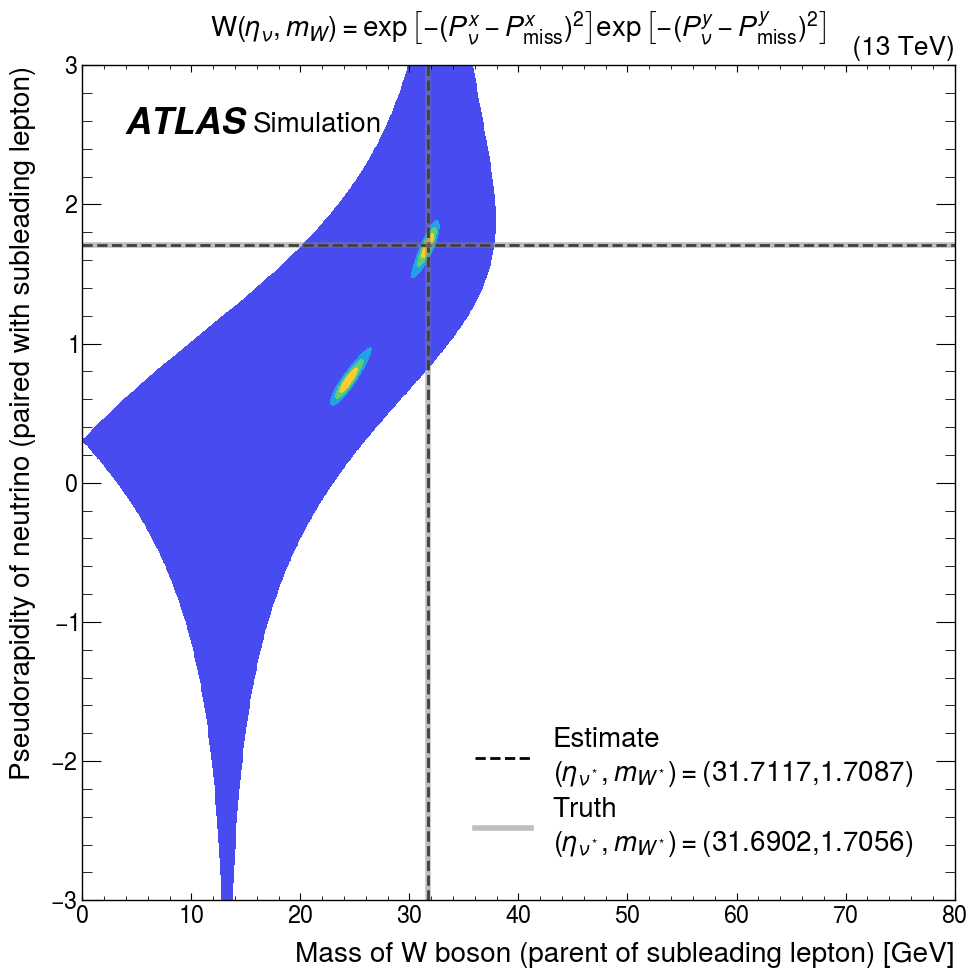

In [194]:
plt.style.use(hep.style.ATLAS)
fig, ax = plt.subplots(figsize=(10,10),tight_layout=True)
ax.set_title(r'$\mathcal{W}(\eta_{\nu},m_{W}) = \exp\left[-({P}^x_{\nu} - P^x_\mathrm{miss})^2\right]\exp\left[-({P}^y_{\nu} - P^y_\mathrm{miss})^2\right]$',pad=20,fontsize=20)
hep.atlas.label(ax=ax,loc=1,fontsize=20)
ax.set_xlabel("Mass of W boson (parent of subleading lepton) [GeV]")
ax.set_ylabel("Pseudorapidity of neutrino (paired with subleading lepton)")
my_cmap = mpl.cm.get_cmap("jet").copy()
my_cmap.set_under('w')
ax.contourf(grid_x, grid_y, weight, vmin=0,cmap=parula_map)
ax.axvline(max_mw, ls='dashed', c='k', lw=2, label='Estimate\n'+r'$(\eta_{\nu^*},m_{W^*})=$(%.4f,%.4f)'%(max_mw,max_eta))
ax.axhline(max_eta, ls='dashed', c='k', lw=2)
ax.axvline(SubleadW_SR.at[evtid,'m'], alpha=0.5, c='grey', lw=4, label='Truth\n'+r'$(\eta_{\nu^*},m_{W^*})=$(%.4f,%.4f)'%(SubleadW_SR.at[evtid,'m'],SubleadNu_SR.at[evtid,'eta']))
ax.axhline(SubleadNu_SR.at[evtid, 'eta'],alpha=0.5, c='grey', lw=4 )
ax.legend(prop={'size':20})
plt.show()